<a href="https://colab.research.google.com/github/BAHAMLAOUHI/Comparison-of-the-Energy-Efficiency-of-Machine-Learning-Algorithms/blob/main/Comparaison_des_performances_%C3%A9nerg%C3%A9tiques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('jm1.csv')

In [ ]:
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


In [ ]:
df.shape

(10885, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

**Dataset Description :**

%      1. loc             : numeric % McCabe's line count of code

%      2. v(g)            : numeric % McCabe "cyclomatic complexity"

%      3. ev(g)           : numeric % McCabe "essential complexity"

%      4. iv(g)           : numeric % McCabe "design complexity"

%      5. n               : numeric % Halstead total operators + operands

%      6. v               : numeric % Halstead "volume"

%      7. l               : numeric % Halstead "program length"

%      8. d               : numeric % Halstead "difficulty"

%      9. i               : numeric % Halstead "intelligence"

%     10. e               : numeric % Halstead "effort"

%     11. b               : numeric % Halstead

%     12. t               : numeric % Halstead's time estimator

%     13. lOCode          : numeric % Halstead's line count

%     14. lOComment       : numeric % Halstead's count of lines of comments

%     15. lOBlank         : numeric % Halstead's count of blank lines

%     16. lOCodeAndComment: numeric

%     17. uniq_Op         : numeric % unique operators

%     18. uniq_Opnd       : numeric % unique operands

%     19. total_Op        : numeric % total operators

%     20. total_Opnd      : numeric % total operands

%     21: branchCount     : numeric % of the flow graph

%     22. defects         : {false,true} % module has/has not one or more reported defects.

# Data Preprocessing

In [ ]:
object_features = df.select_dtypes(include='object').columns

In [ ]:
object_features

Index(['uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'], dtype='object')

In [ ]:
df = df[df['uniq_Opnd'] != "?"]

In [ ]:
for col in object_features:
      df[col] = df[col].astype(float)


In [ ]:
df.isnull().sum()

,0
loc,0
v(g),0
ev(g),0
iv(g),0
n,0
v,0
l,0
d,0
i,0
e,0


In [ ]:
df['defects'] = df['defects'].replace({True: 1, False: 0})

<ipython-input-52-af2c393468e7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['defects'] = df['defects'].replace({True: 1, False: 0})


In [ ]:
df['defects'].value_counts()

,count
defects,
0,8777
1,2103


In [ ]:
df.duplicated().sum()

1973

In [ ]:
duplicate_rows = df[df.duplicated(keep=False)]


In [ ]:
df.shape

(10880, 22)

In [ ]:
duplicate_rows["defects"].value_counts()

,count
defects,
0,2475
1,153


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(8907, 22)

In [ ]:
df['defects'].value_counts()

,count
defects,
0,6903
1,2004


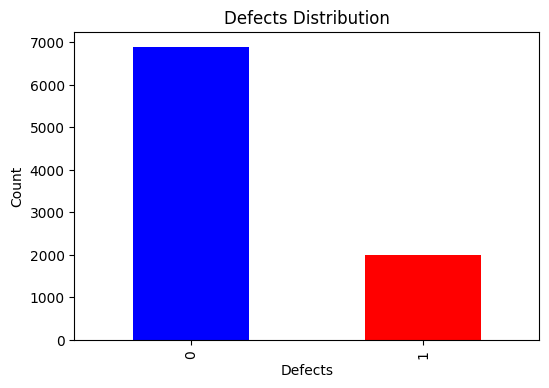

In [ ]:
df['defects'].value_counts().plot(kind='bar', color=['blue', 'red'], figsize=(6, 4))
plt.xlabel('Defects')
plt.ylabel('Count')
plt.title('Defects Distribution')
plt.show()

In [ ]:
features = df.columns.tolist()
features.remove('defects')

In [ ]:
features

['loc',
 'v(g)',
 'ev(g)',
 'iv(g)',
 'n',
 'v',
 'l',
 'd',
 'i',
 'e',
 'b',
 't',
 'lOCode',
 'lOComment',
 'lOBlank',
 'locCodeAndComment',
 'uniq_Op',
 'uniq_Opnd',
 'total_Op',
 'total_Opnd',
 'branchCount']

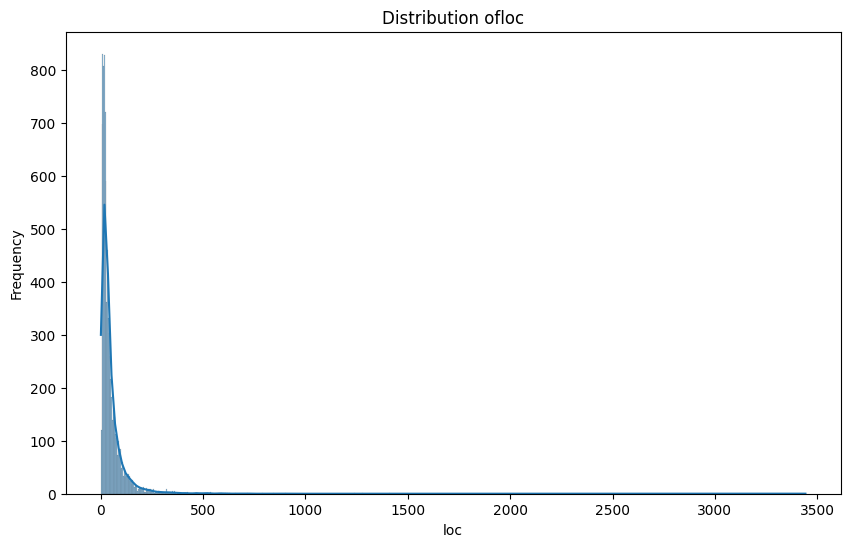

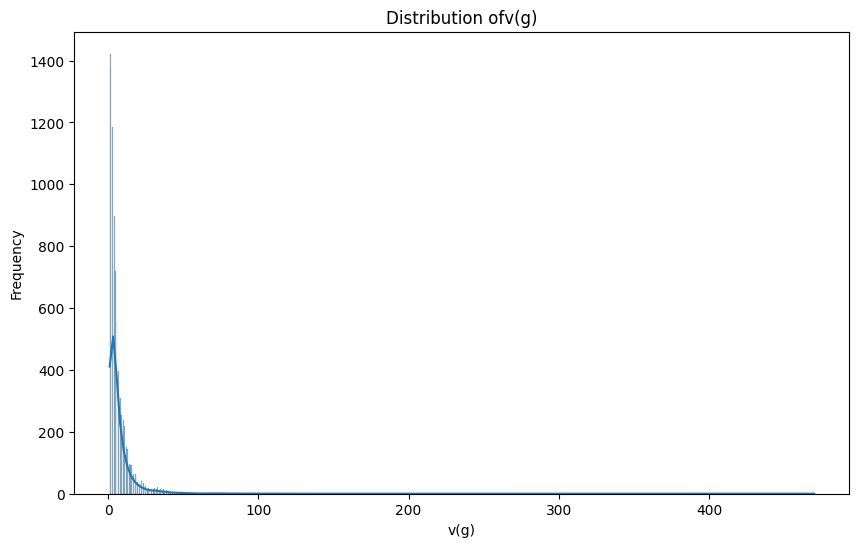

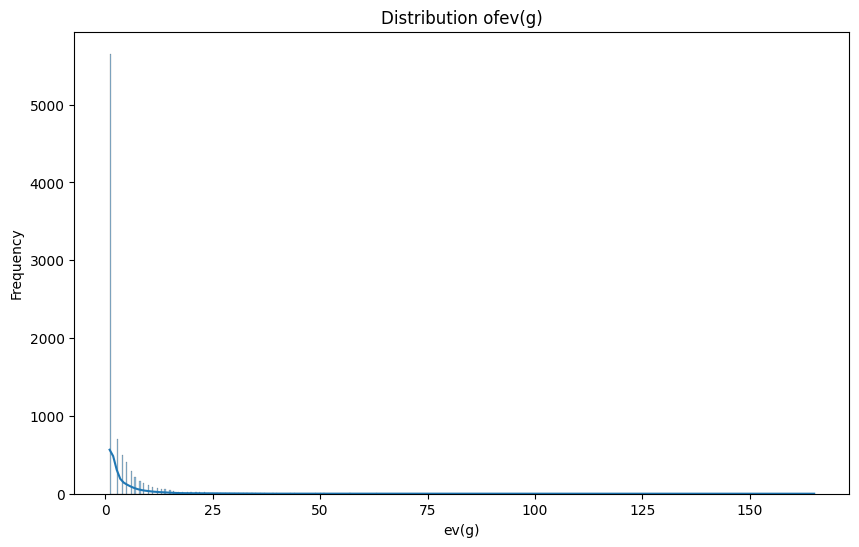

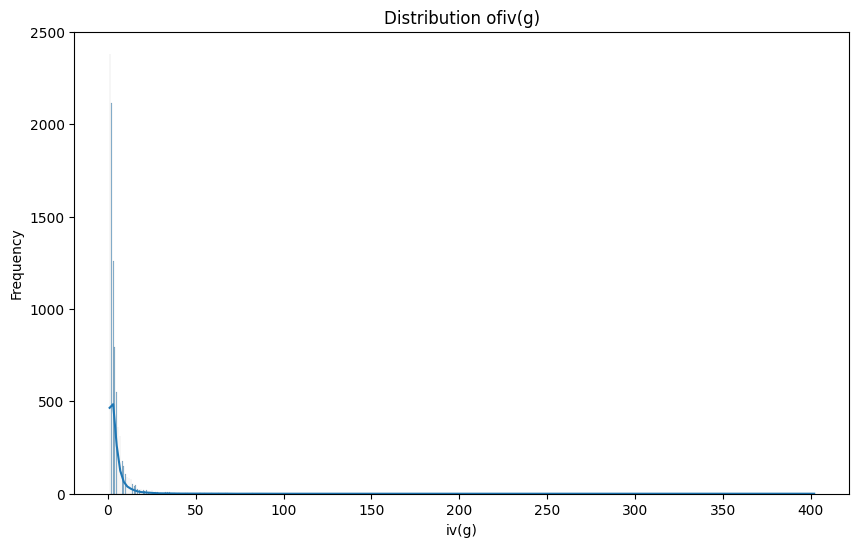

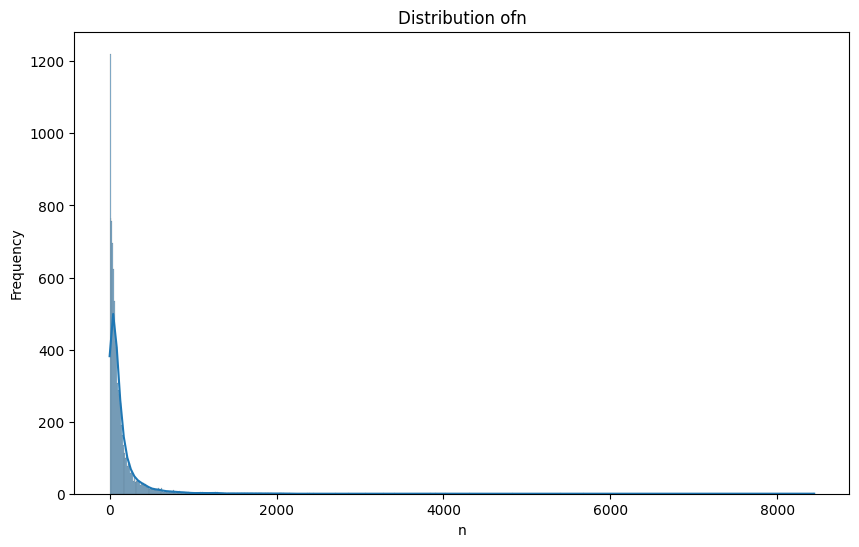

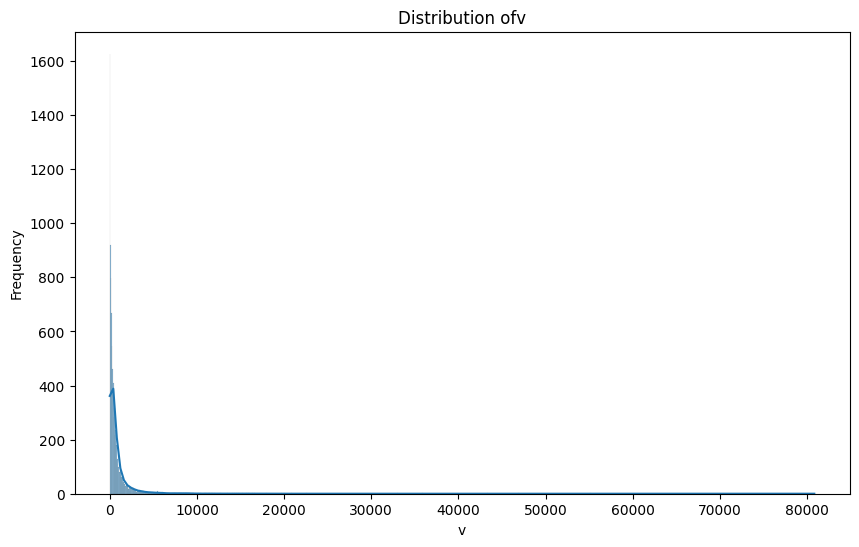

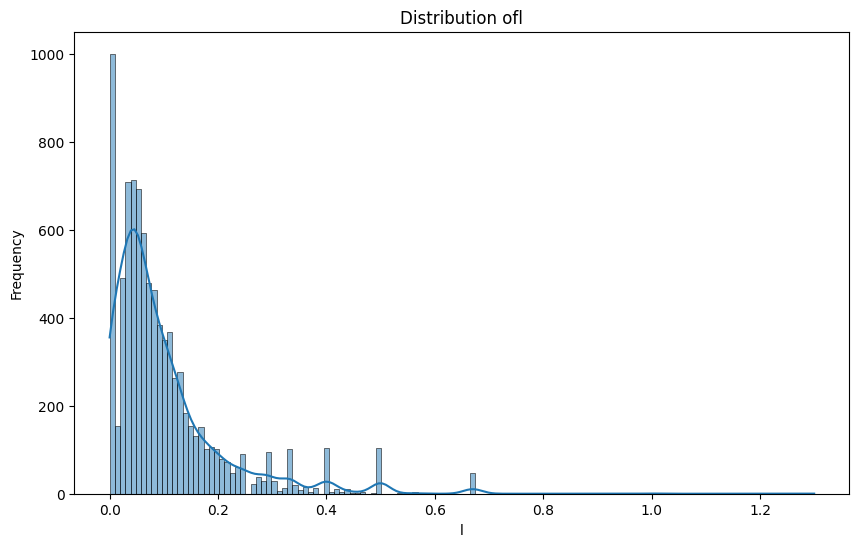

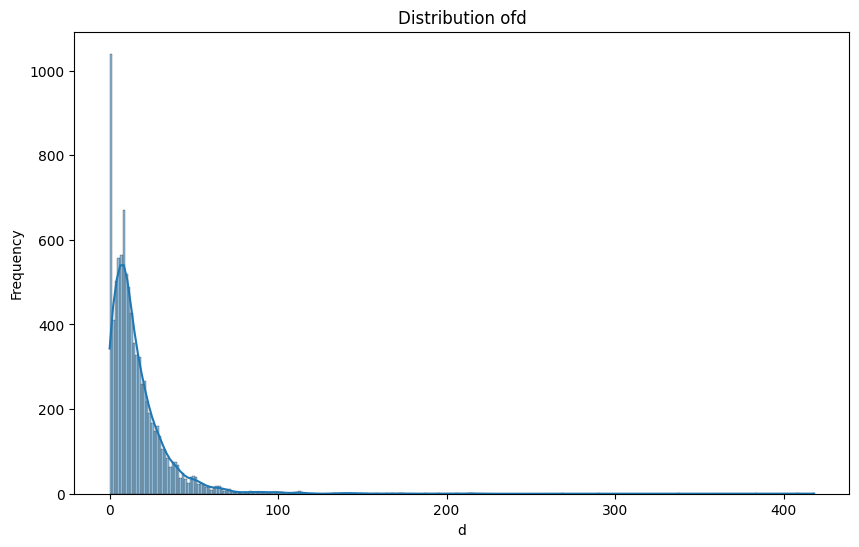

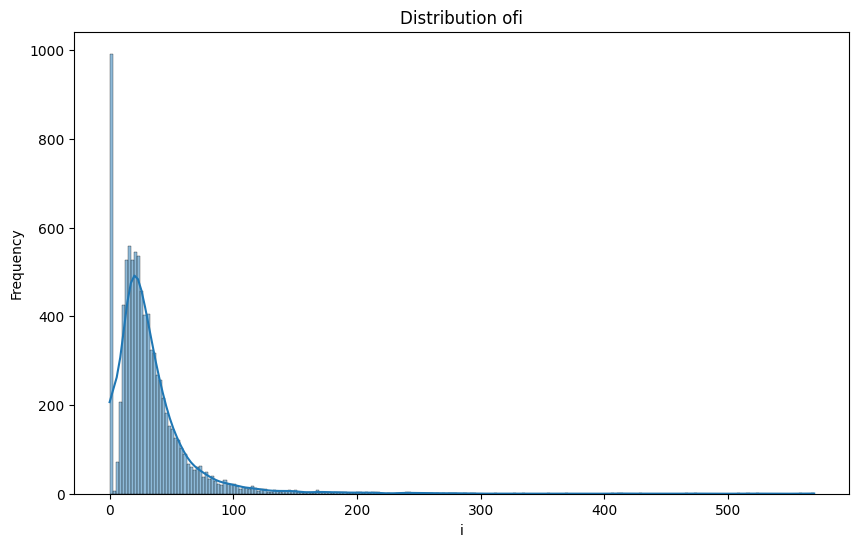

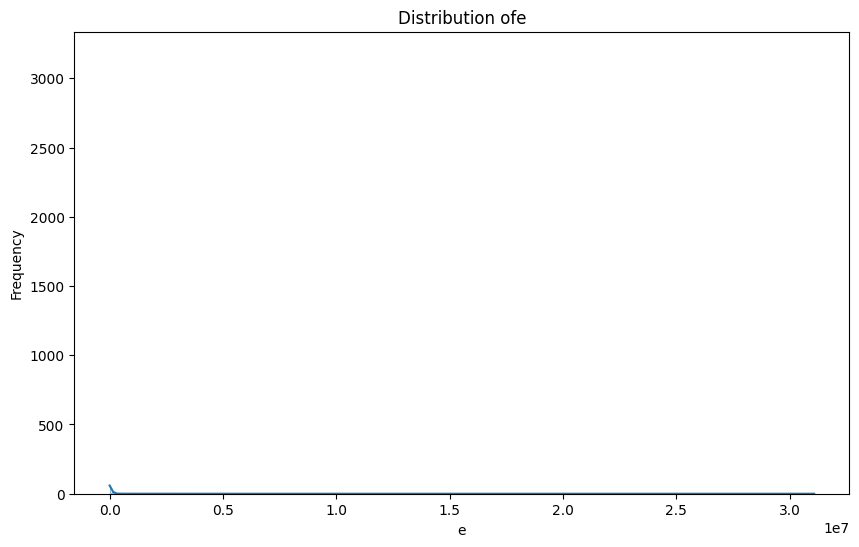

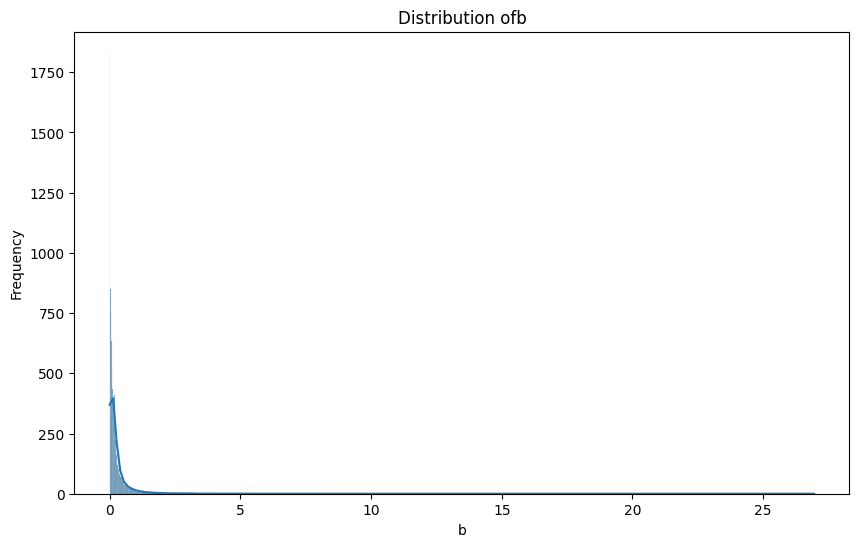

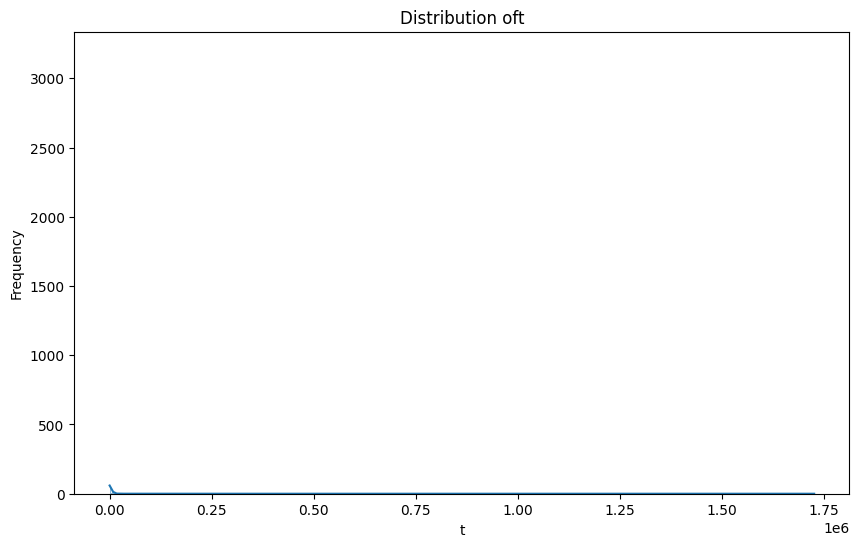

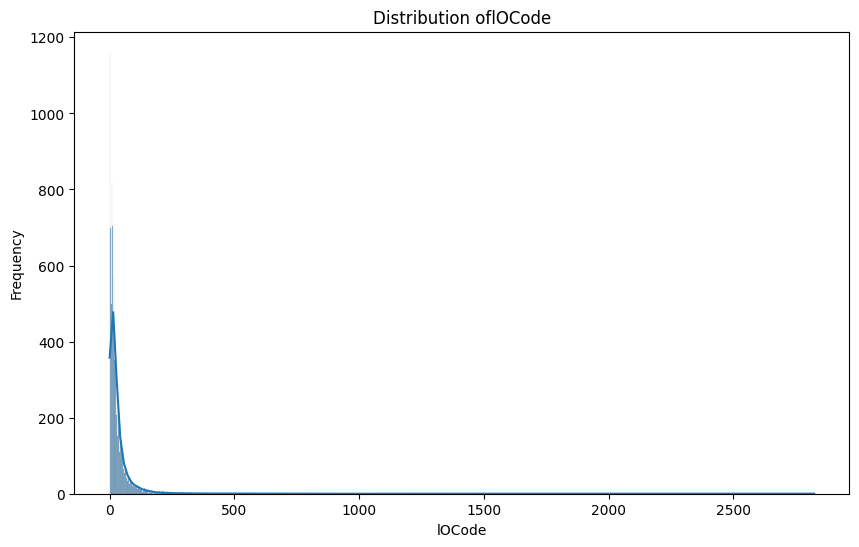

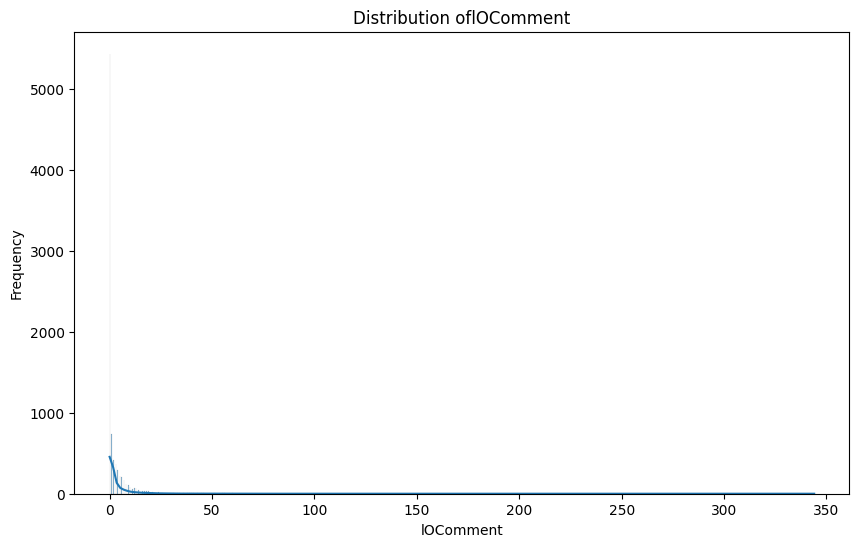

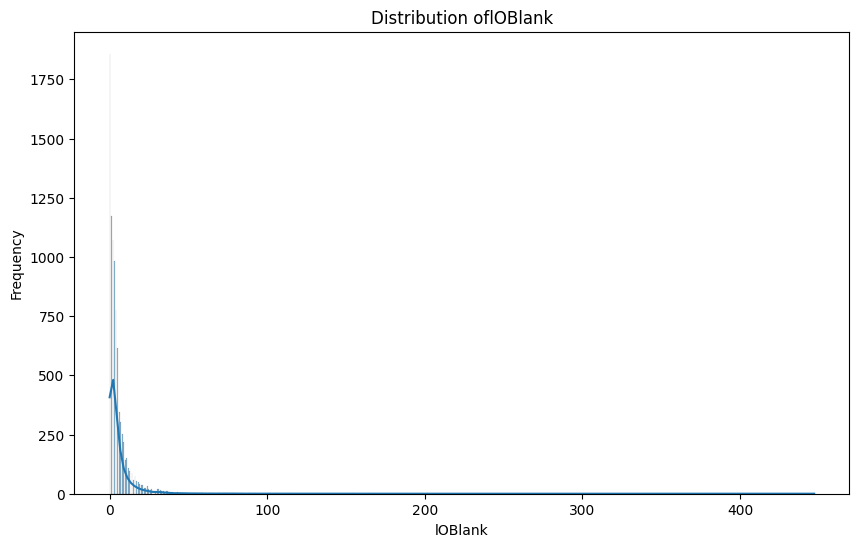

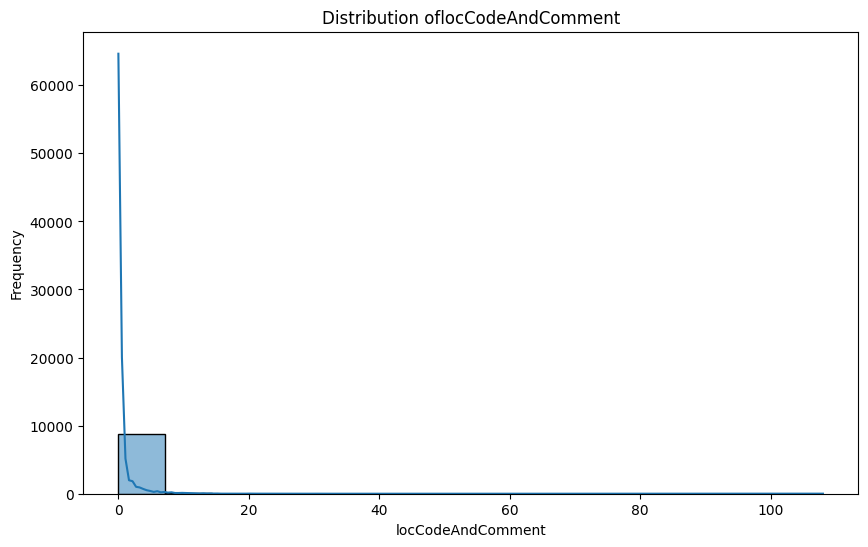

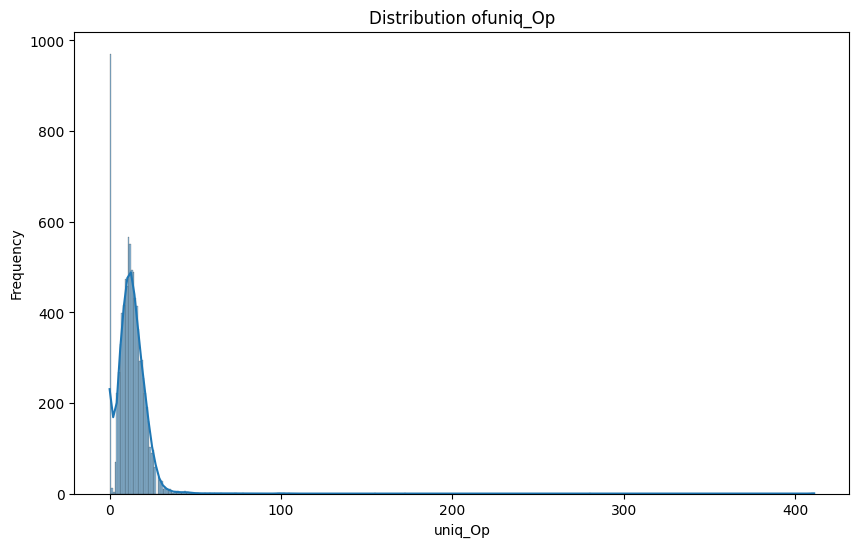

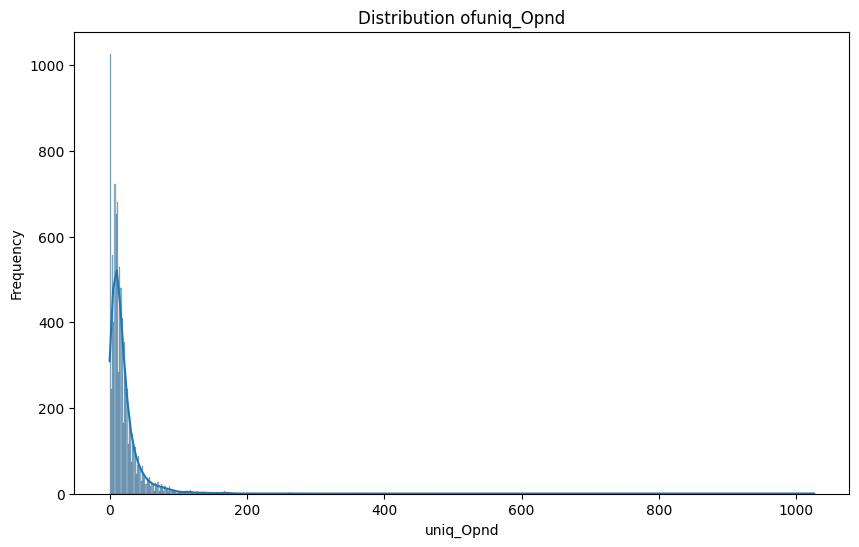

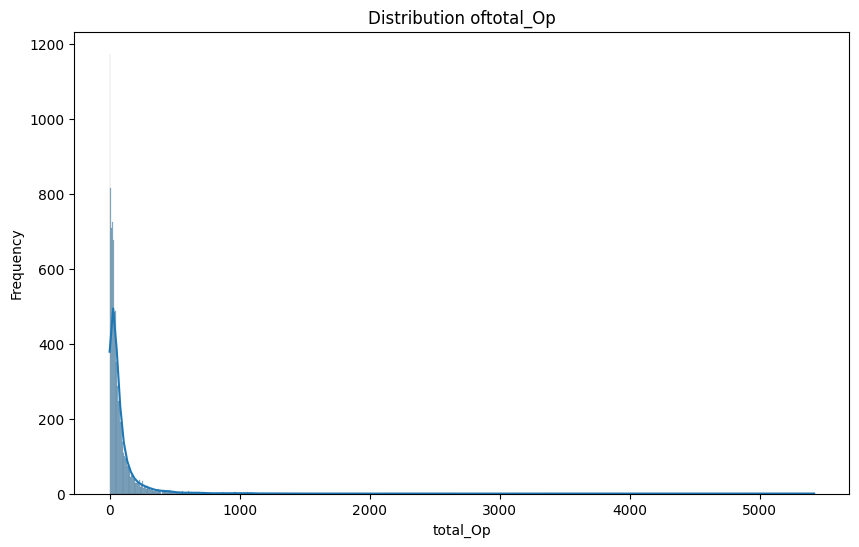

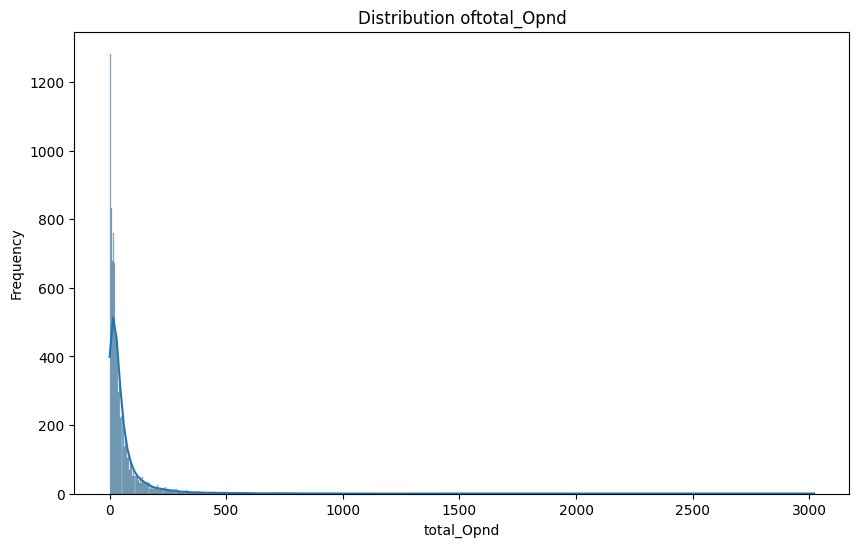

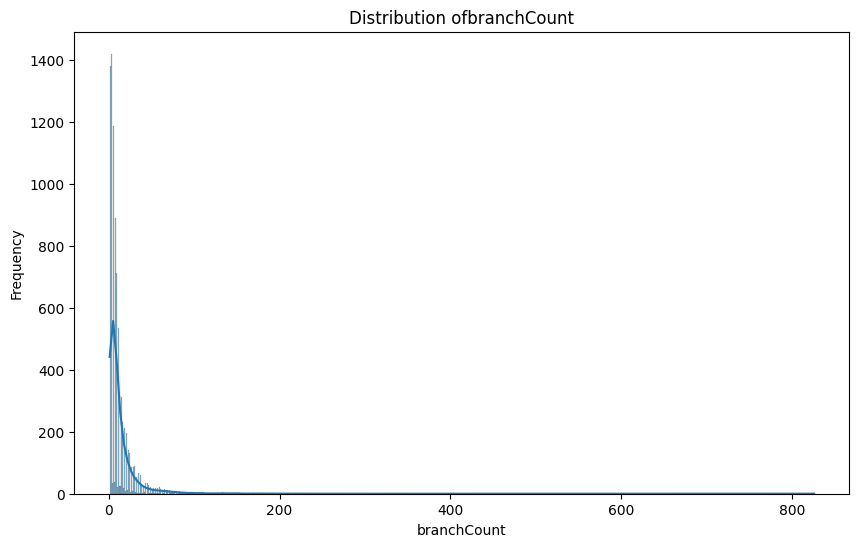

In [ ]:
for f in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[f], kde=True)
    plt.title('Distribution of'+ f)
    plt.xlabel(f)
    plt.ylabel('Frequency')
    plt.show()

From the right Skewness of these different distributions , we notice that the majority are around 0 (have low values) compared the minority with high values .

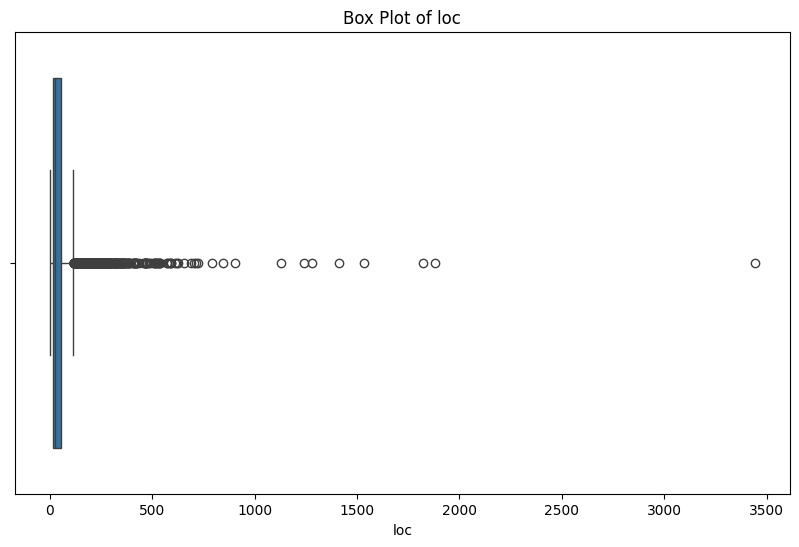

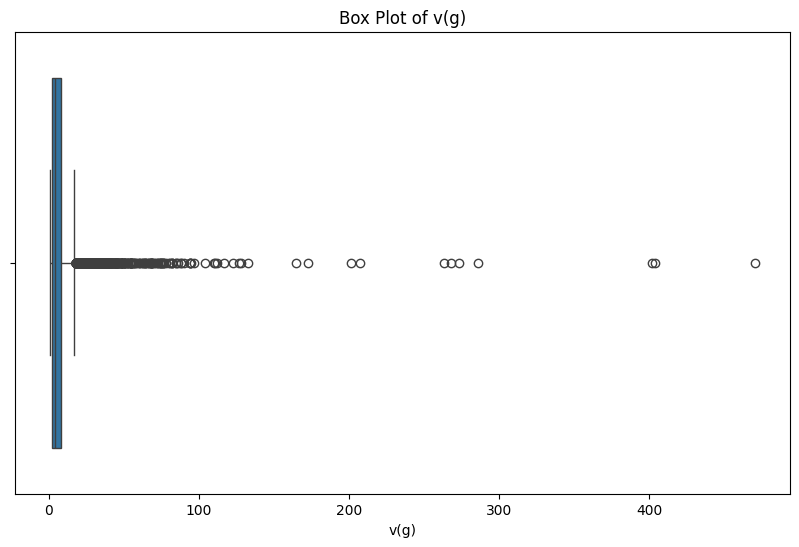

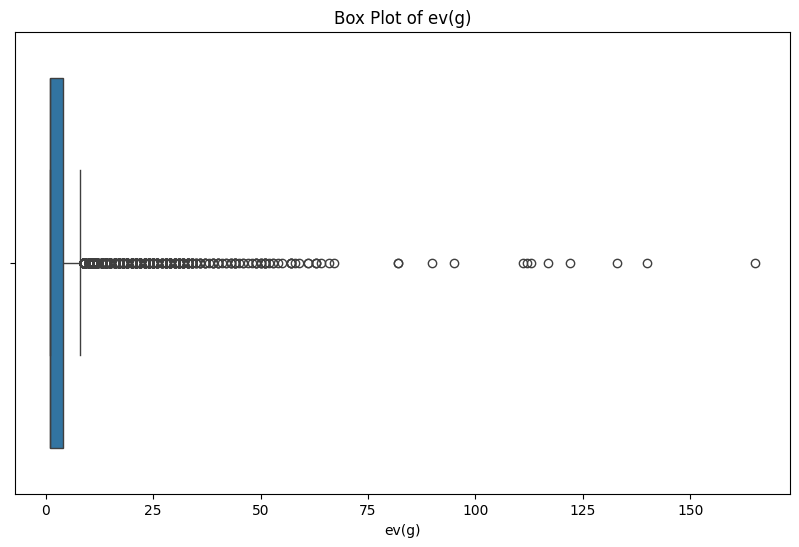

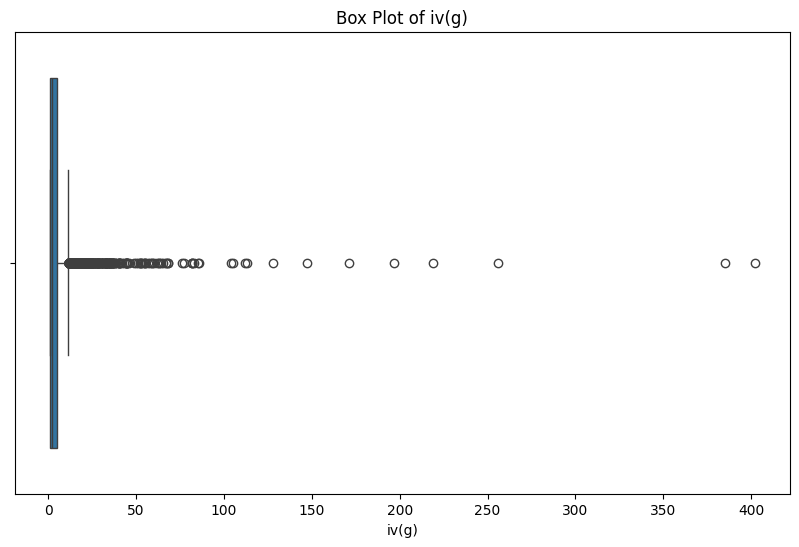

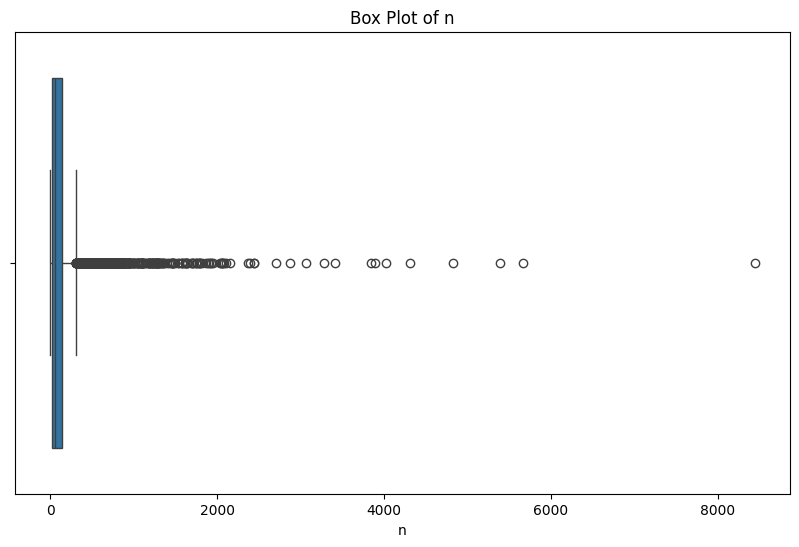

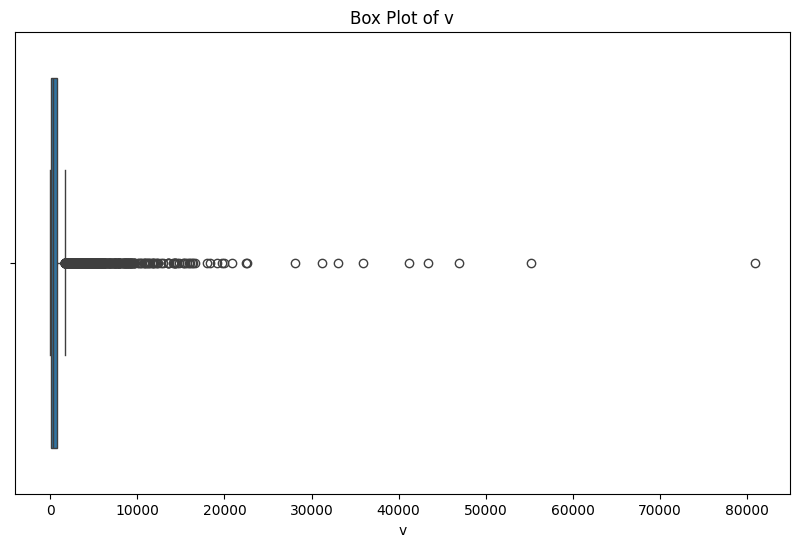

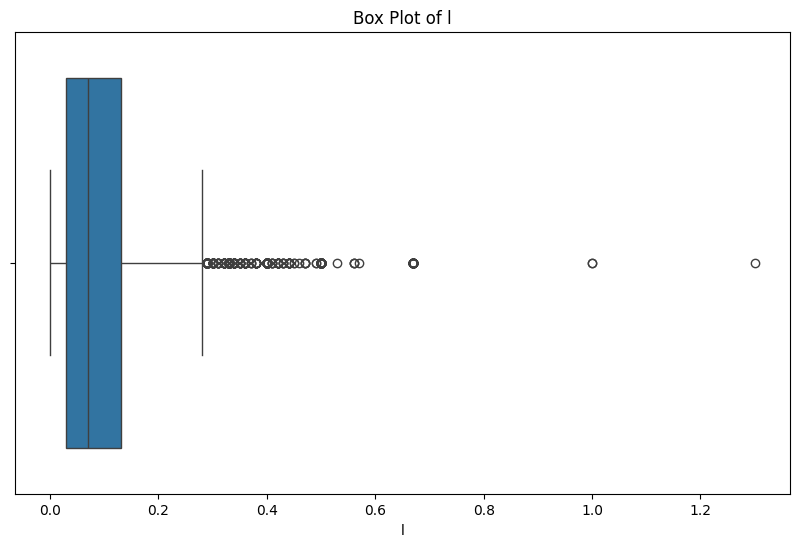

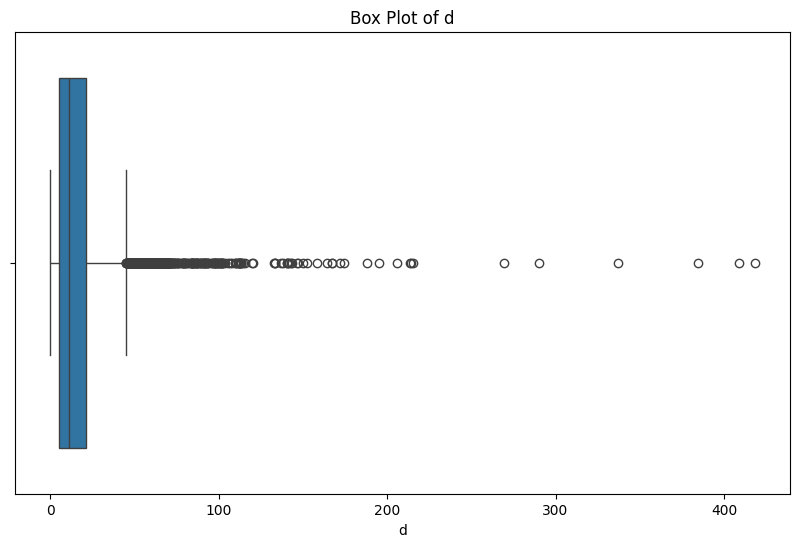

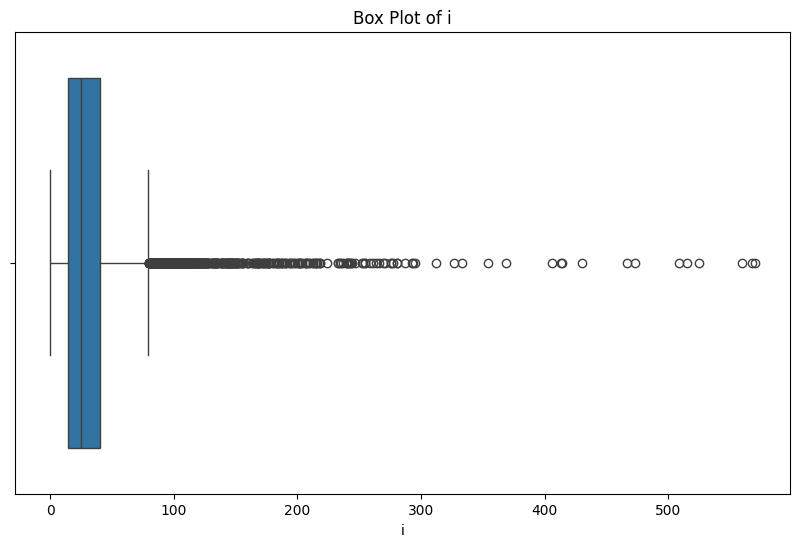

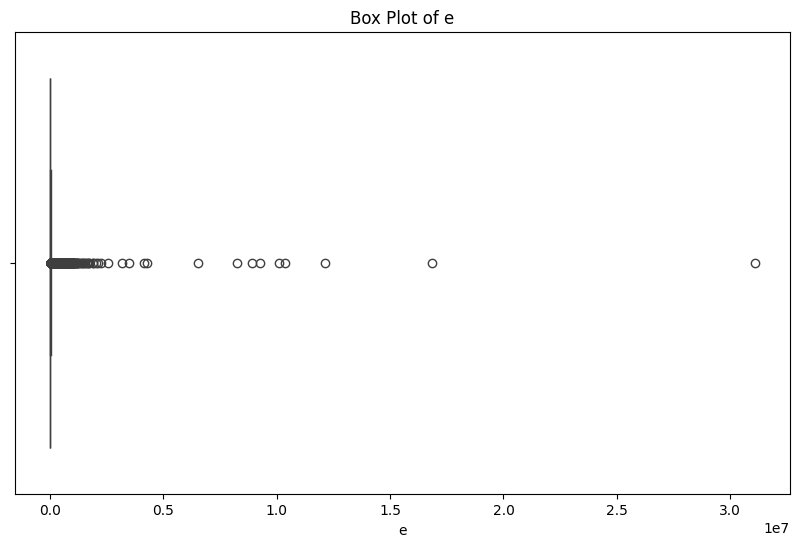

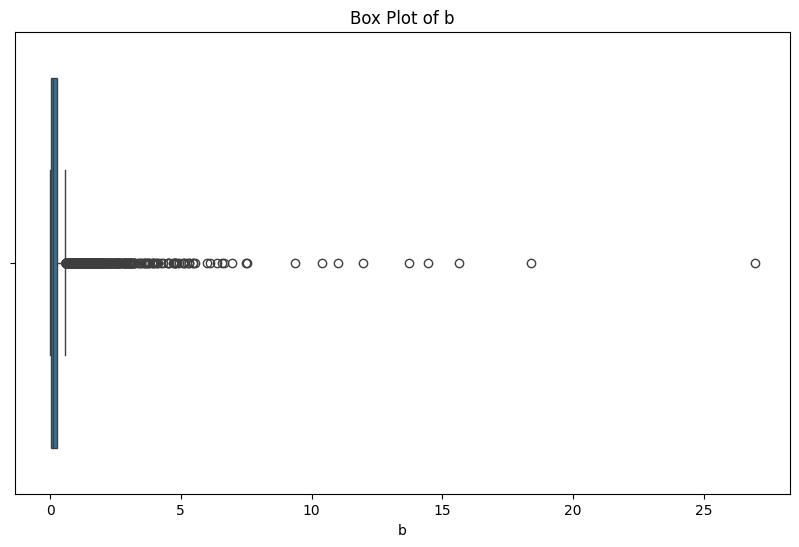

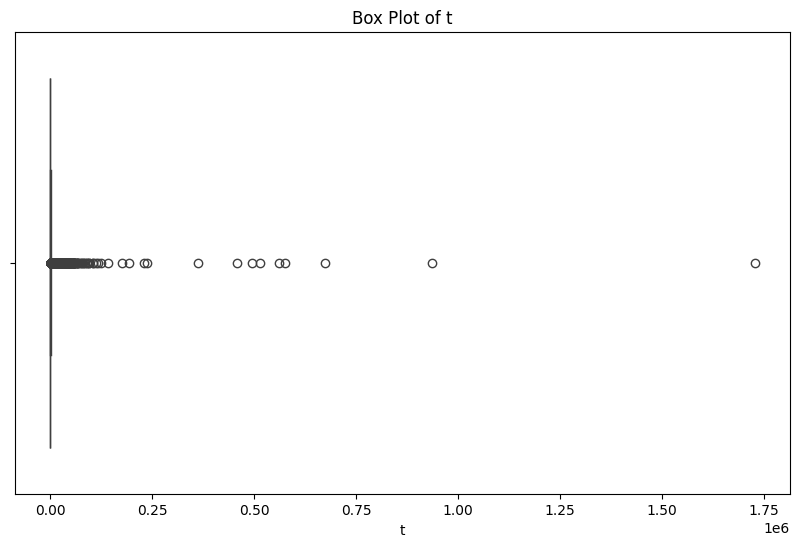

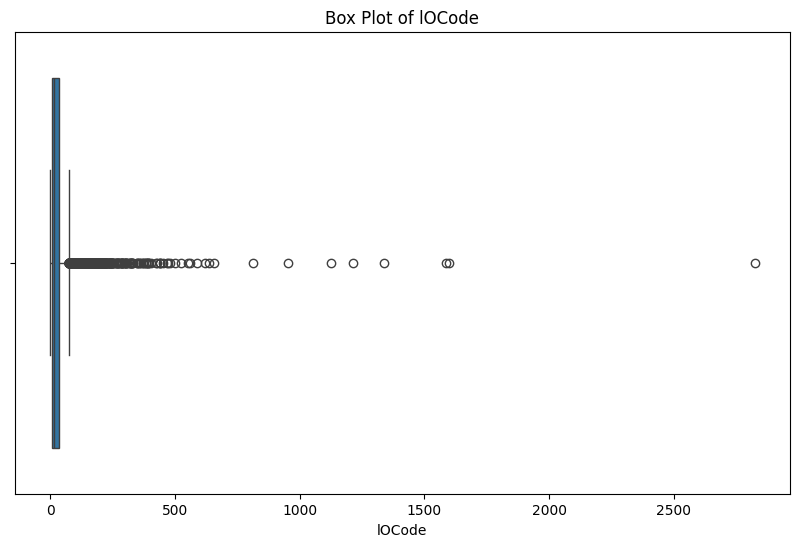

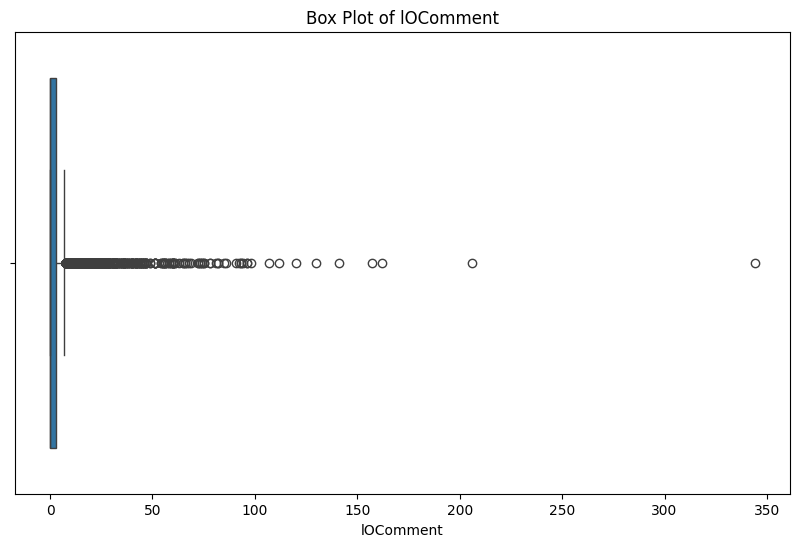

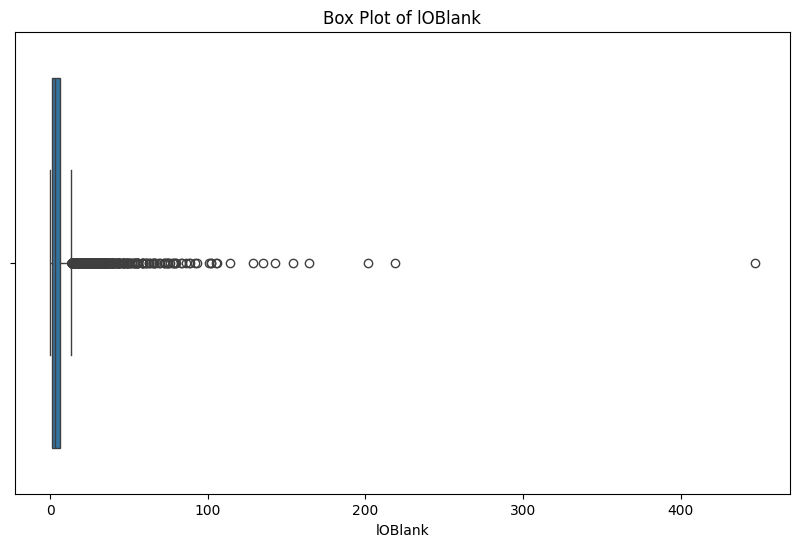

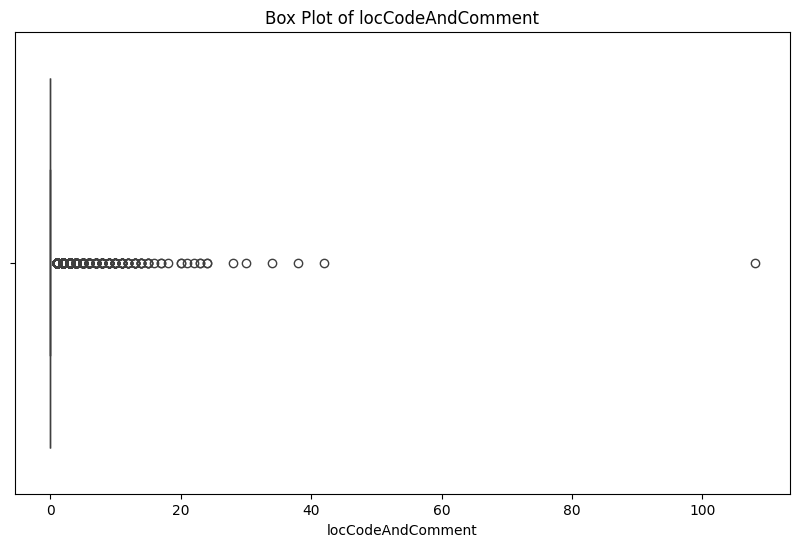

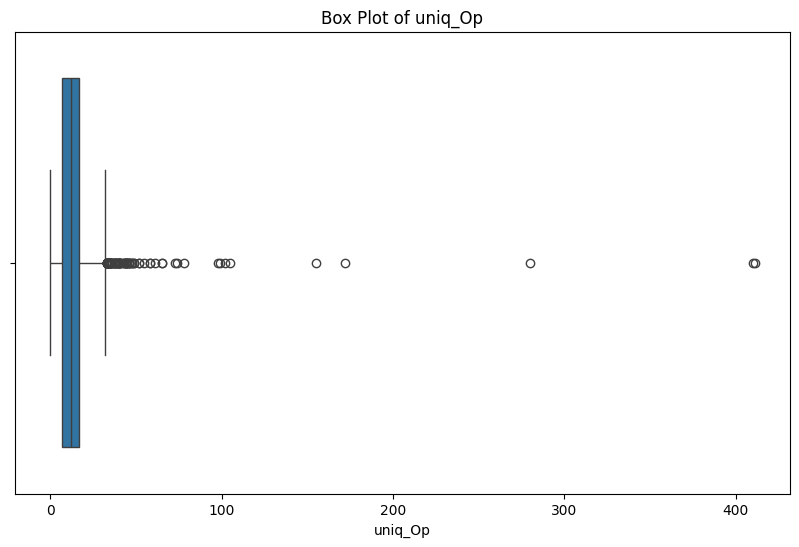

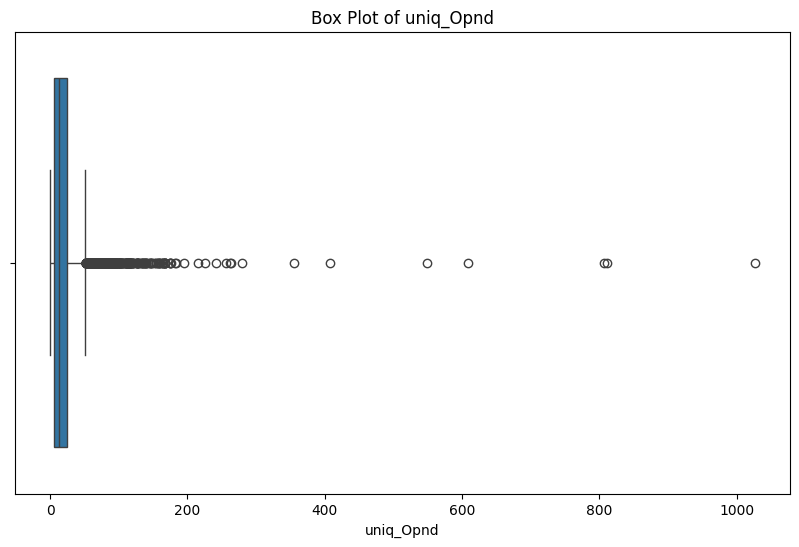

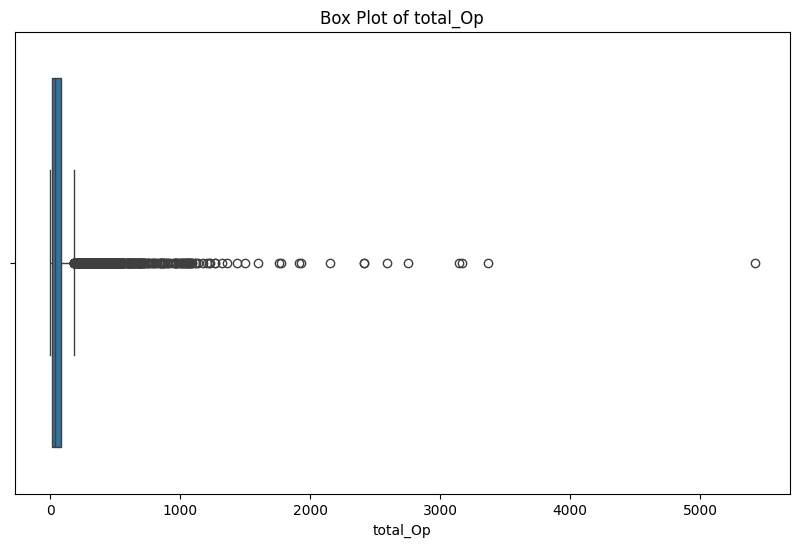

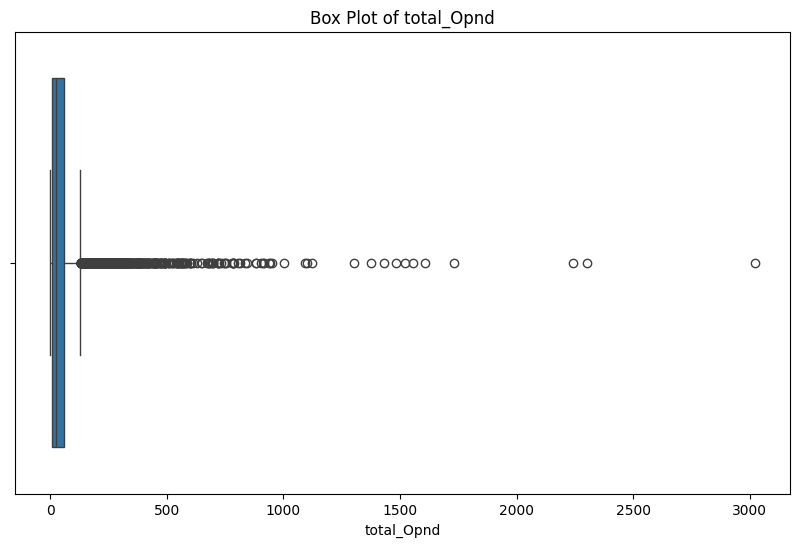

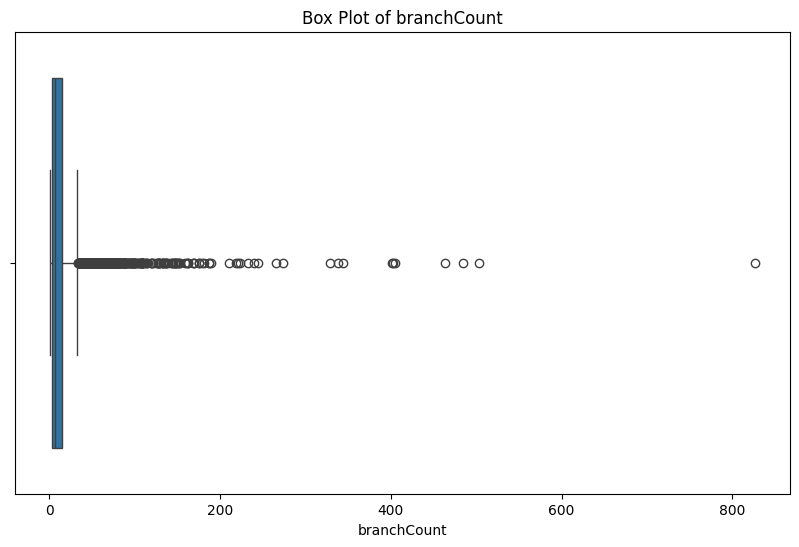

In [ ]:
for f in features:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[f])
  plt.title('Box Plot of '+f)
  plt.show()

we see here that we have many outliers , but in our task , it could be a sign of a potentiel need for refactoring

# Data Normalization :
before normalizing our data , we dont have a normal distribution in any of our features, so a log before apllying z-score normalization could help us to minimize the influence of these high values ( outliers)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8907 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                8907 non-null   float64
 1   v(g)               8907 non-null   float64
 2   ev(g)              8907 non-null   float64
 3   iv(g)              8907 non-null   float64
 4   n                  8907 non-null   float64
 5   v                  8907 non-null   float64
 6   l                  8907 non-null   float64
 7   d                  8907 non-null   float64
 8   i                  8907 non-null   float64
 9   e                  8907 non-null   float64
 10  b                  8907 non-null   float64
 11  t                  8907 non-null   float64
 12  lOCode             8907 non-null   int64  
 13  lOComment          8907 non-null   int64  
 14  lOBlank            8907 non-null   int64  
 15  locCodeAndComment  8907 non-null   int64  
 16  uniq_Op            8907 non-

In [ ]:
for feature in features:
    df[feature] = np.log1p(df[feature])

# Now apply Z-score normalization using StandardScaler
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

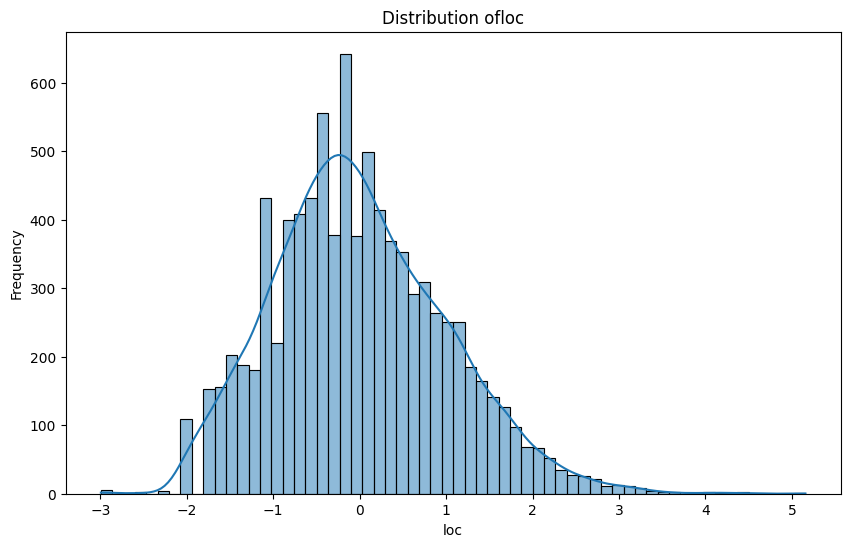

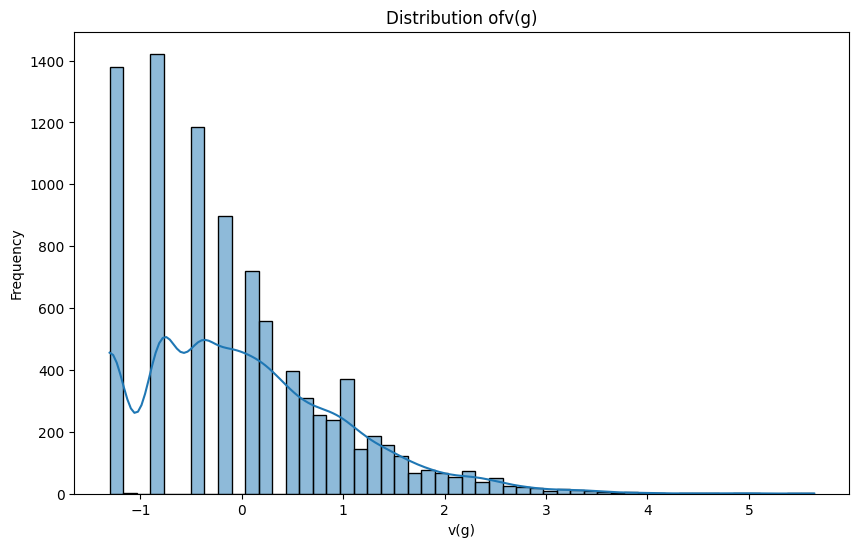

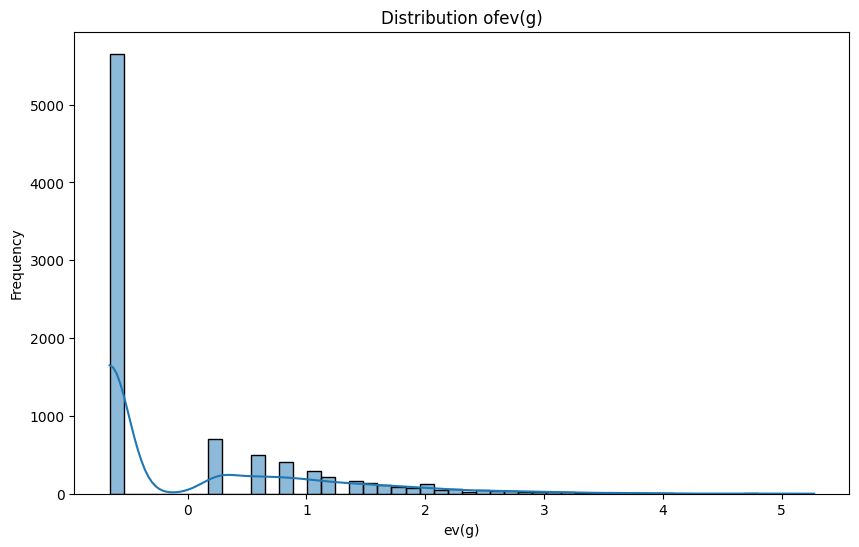

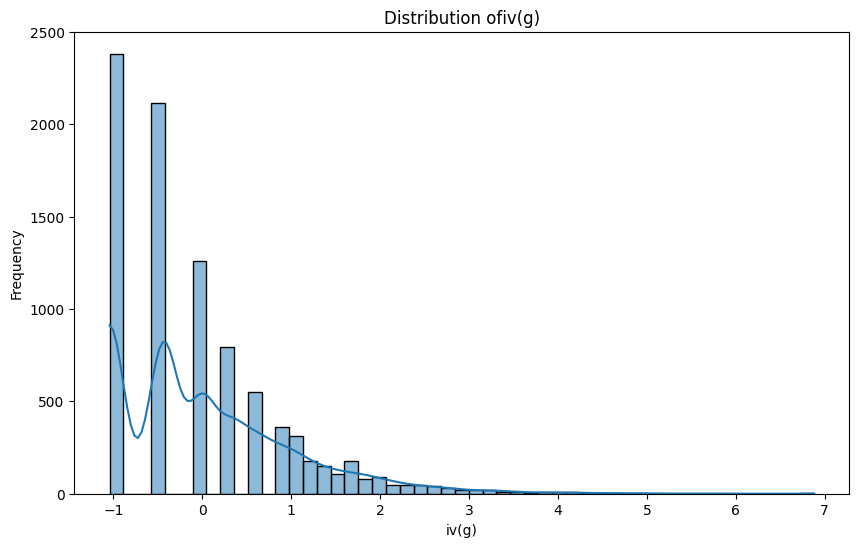

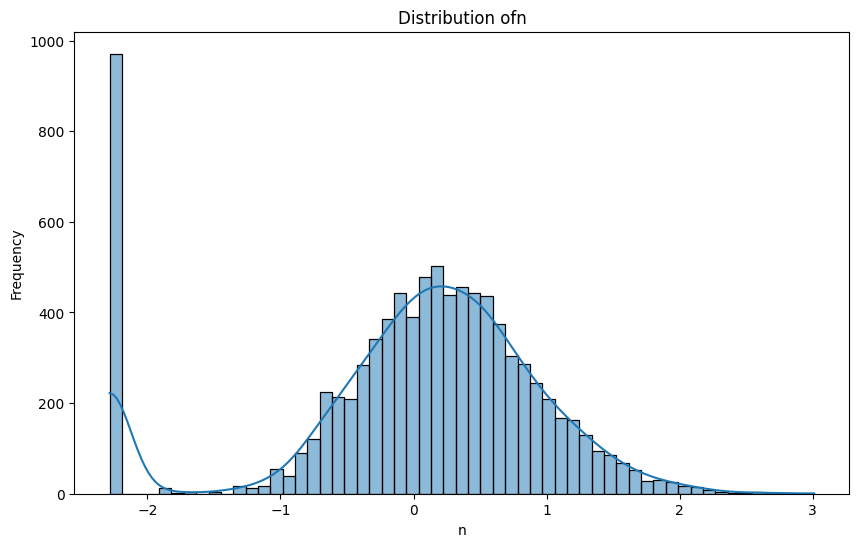

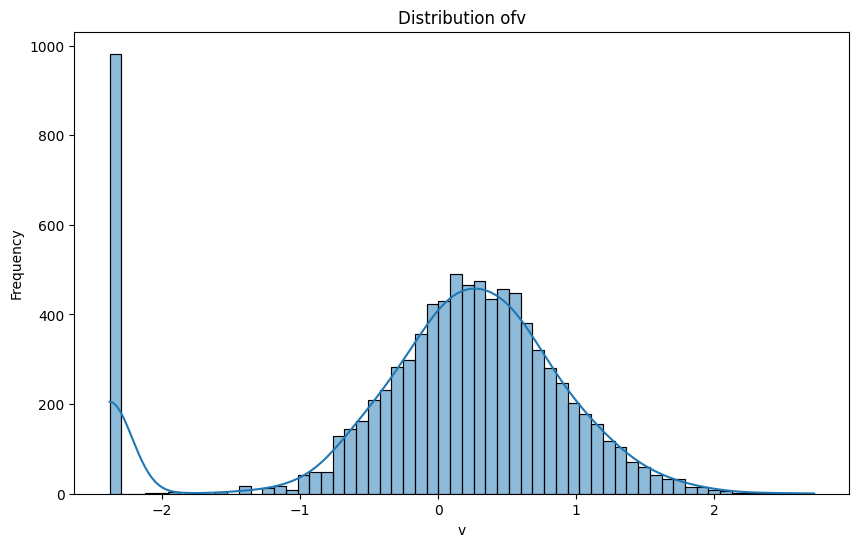

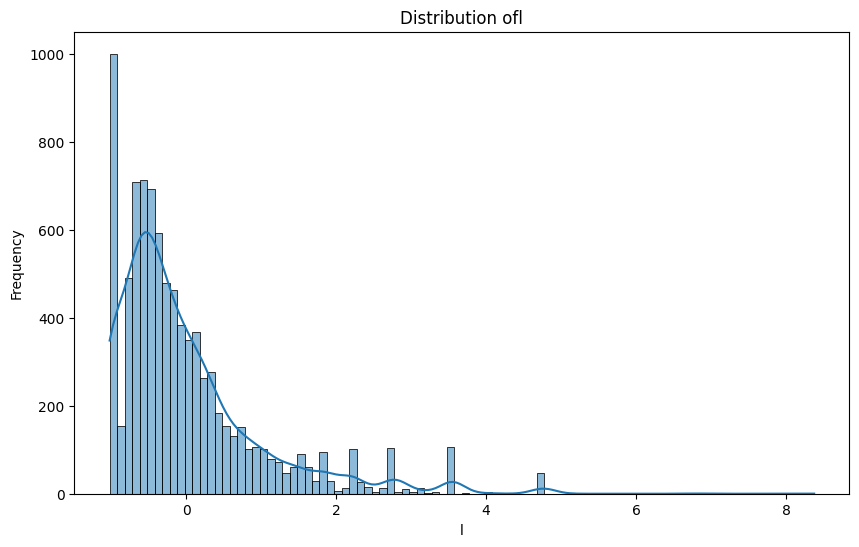

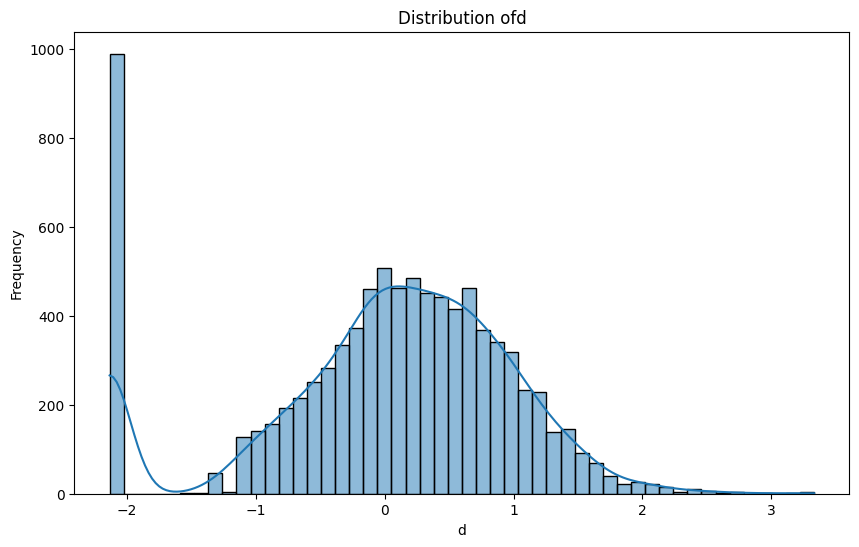

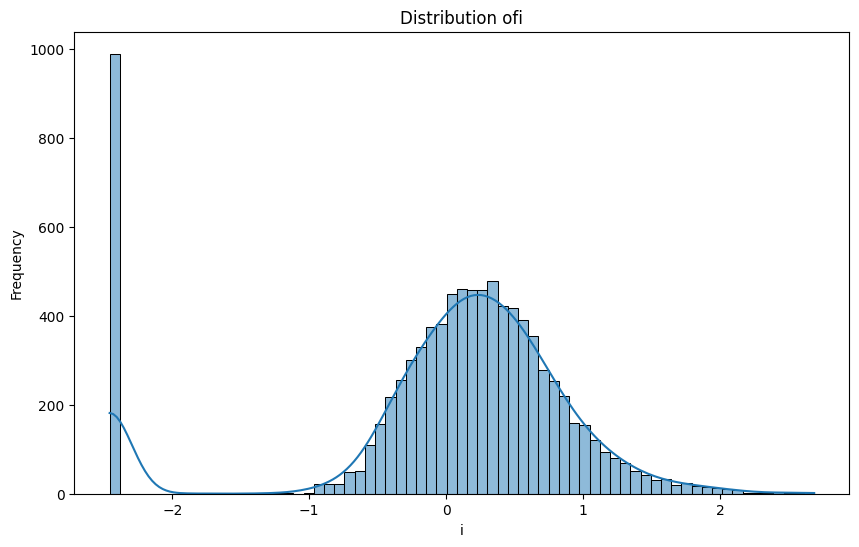

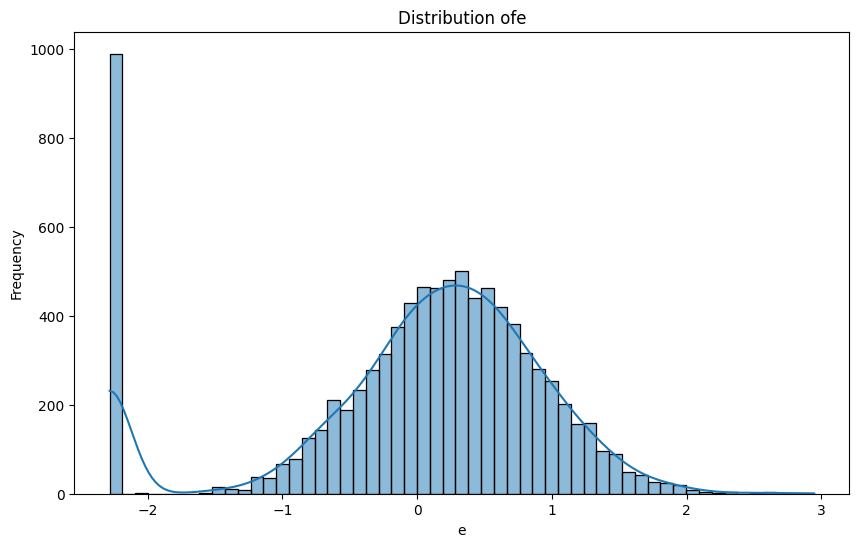

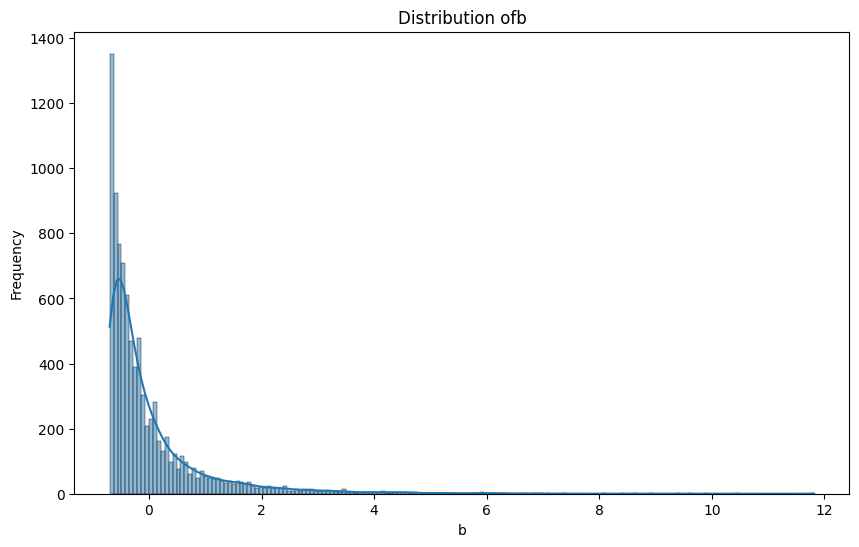

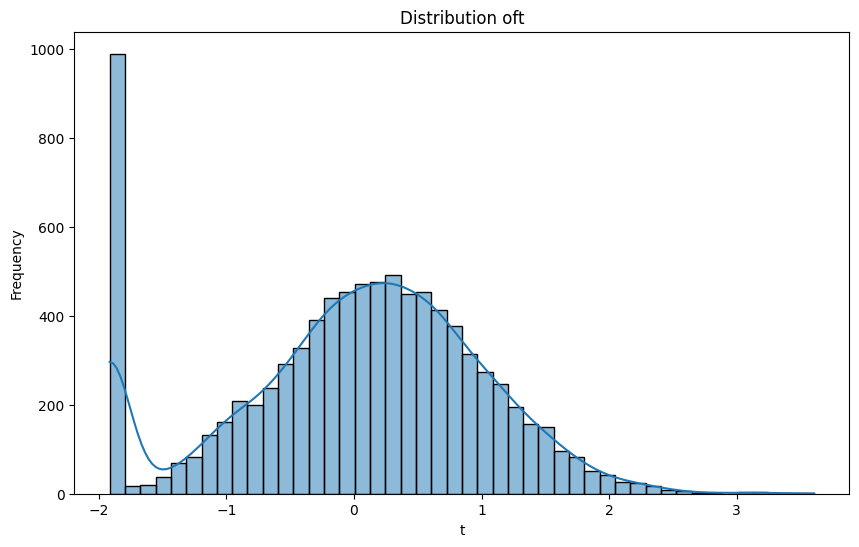

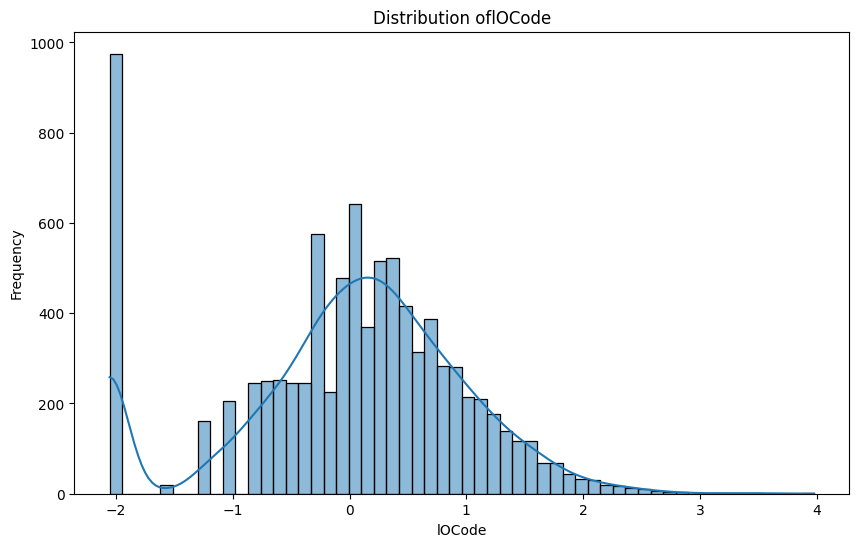

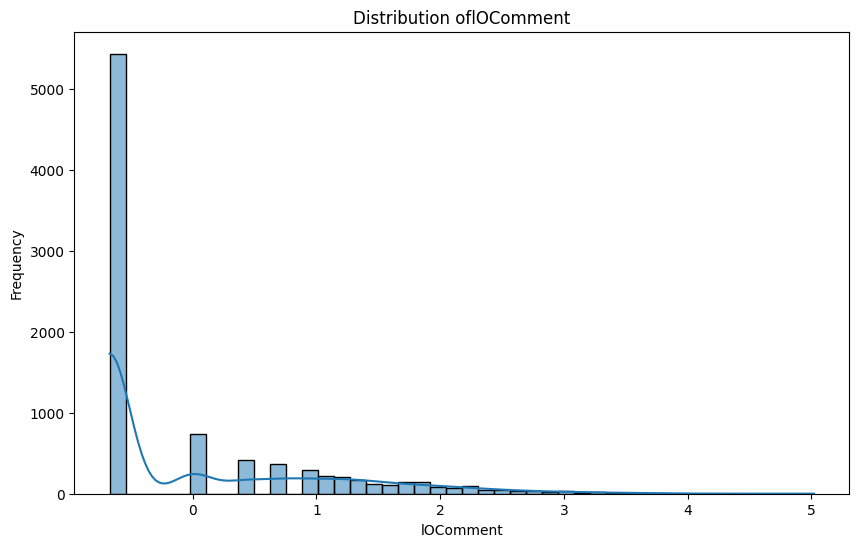

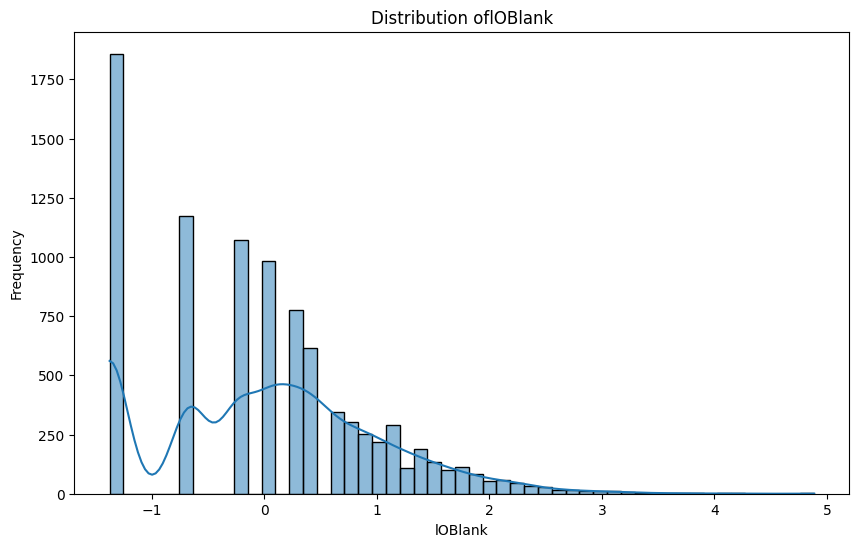

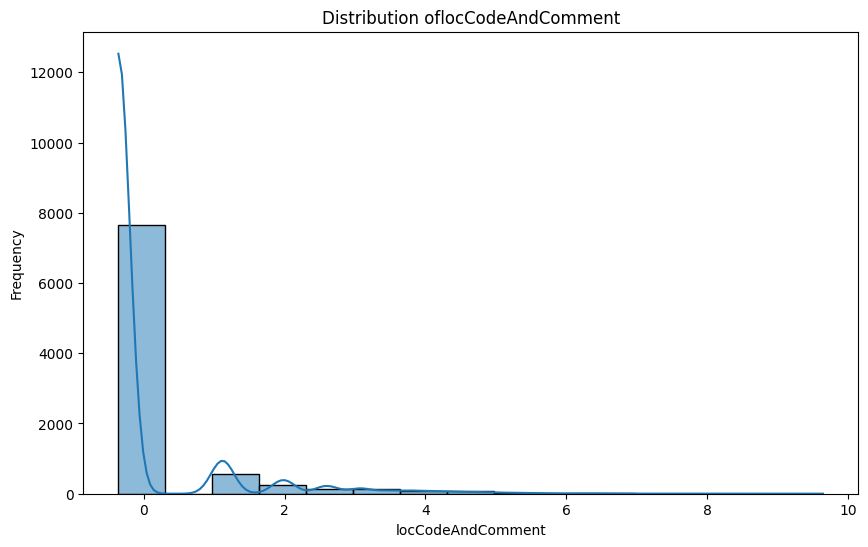

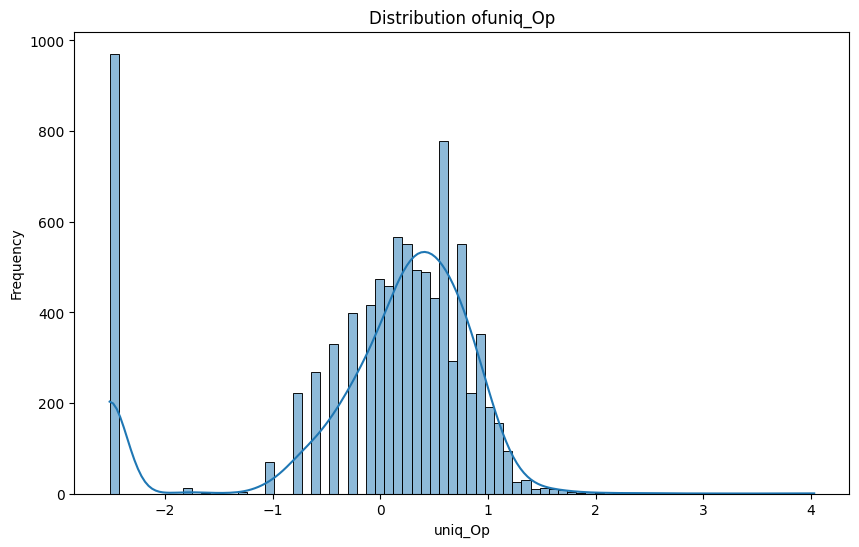

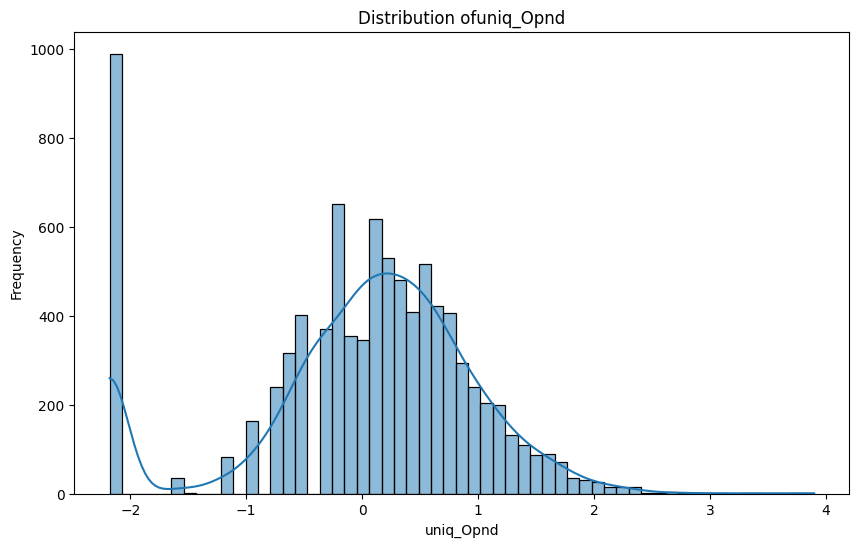

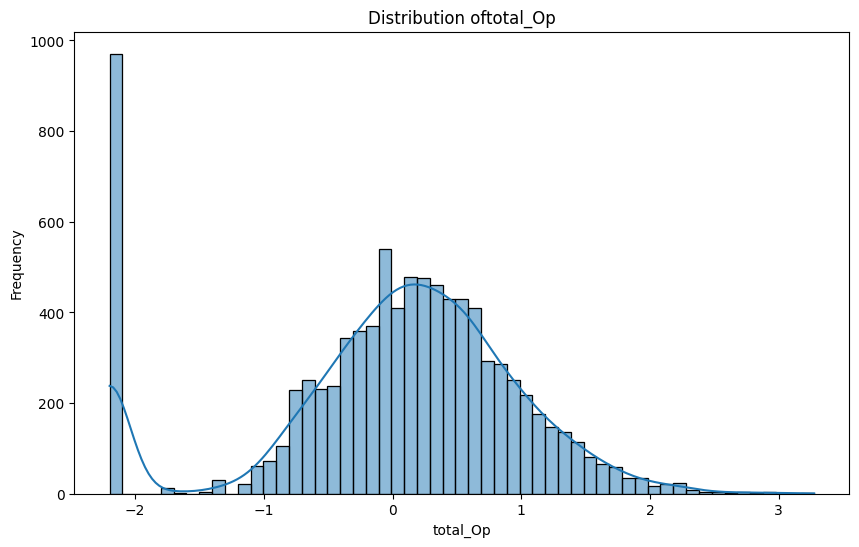

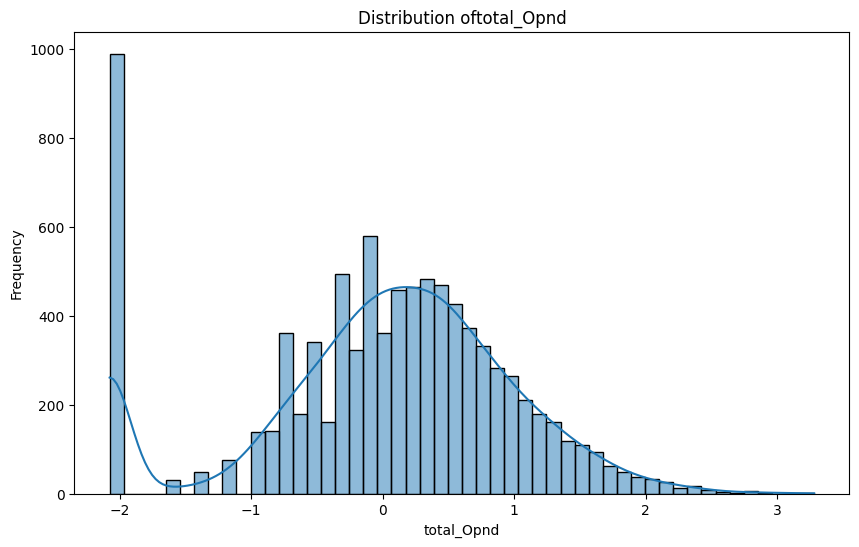

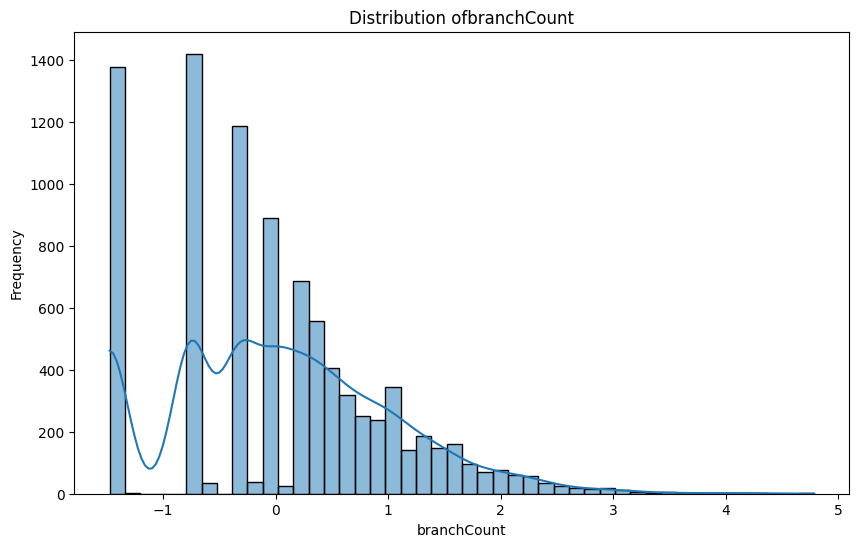

In [ ]:
for f in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[f], kde=True)
    plt.title('Distribution of'+ f)
    plt.xlabel(f)
    plt.ylabel('Frequency')
    plt.show()

# Feature Selection

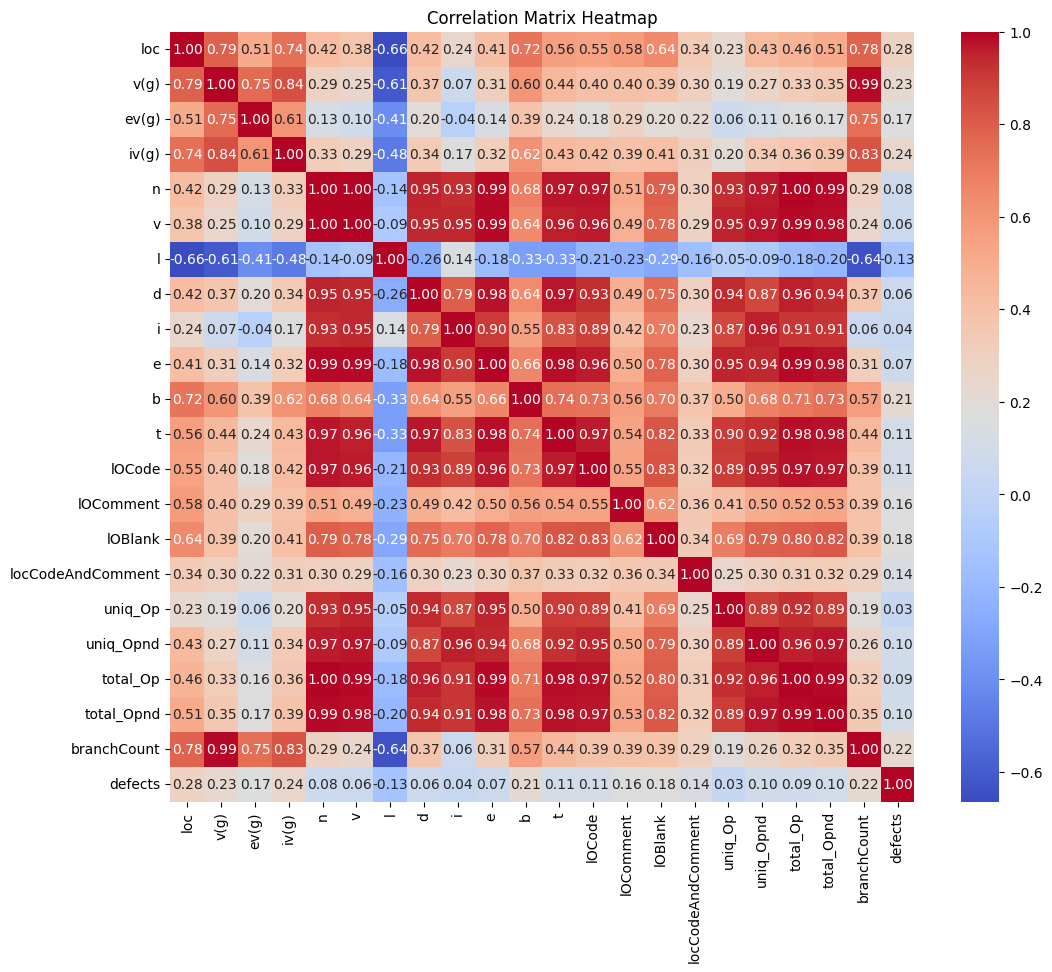

In [ ]:
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8907 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                8907 non-null   float64
 1   v(g)               8907 non-null   float64
 2   ev(g)              8907 non-null   float64
 3   iv(g)              8907 non-null   float64
 4   n                  8907 non-null   float64
 5   v                  8907 non-null   float64
 6   l                  8907 non-null   float64
 7   d                  8907 non-null   float64
 8   i                  8907 non-null   float64
 9   e                  8907 non-null   float64
 10  b                  8907 non-null   float64
 11  t                  8907 non-null   float64
 12  lOCode             8907 non-null   float64
 13  lOComment          8907 non-null   float64
 14  lOBlank            8907 non-null   float64
 15  locCodeAndComment  8907 non-null   float64
 16  uniq_Op            8907 non-

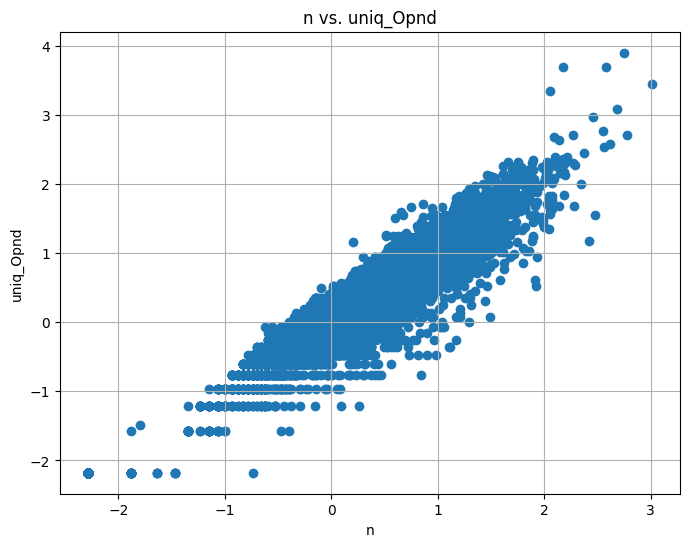

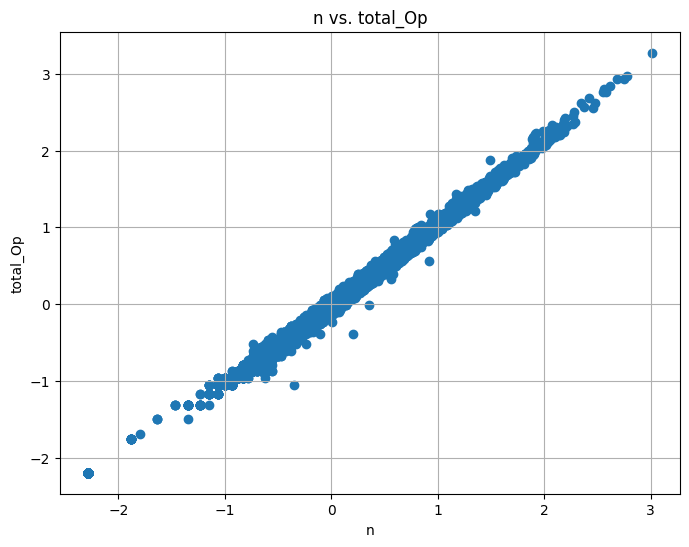

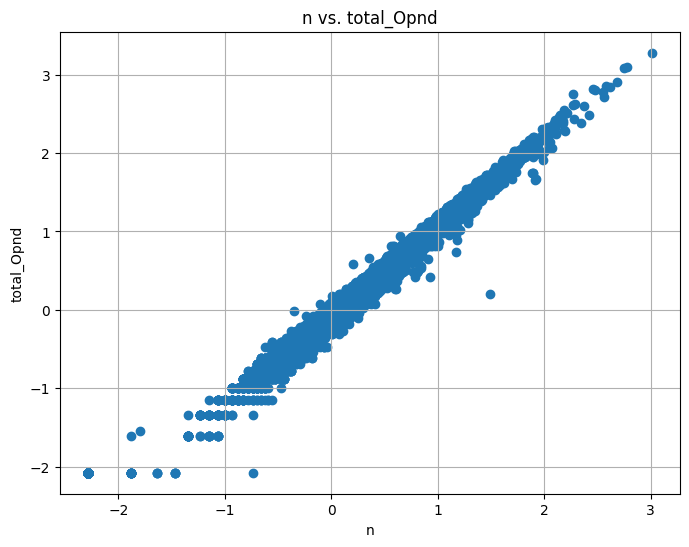

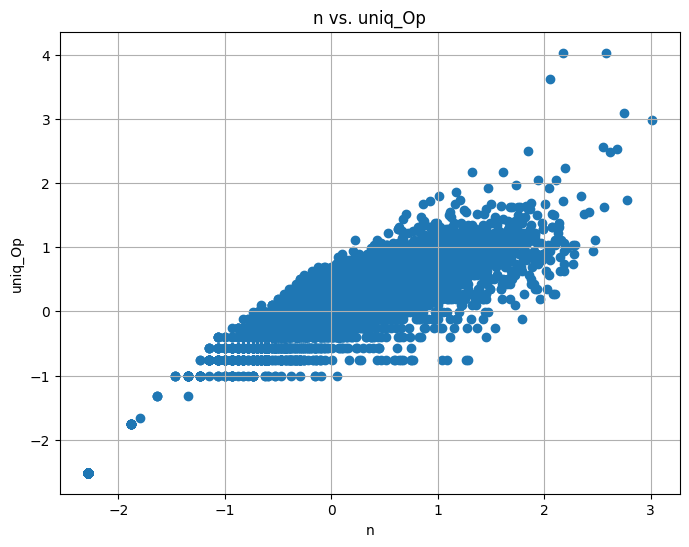

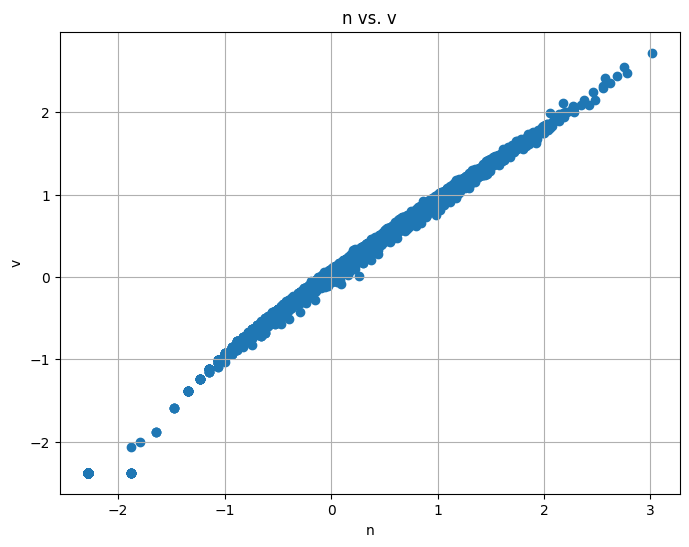

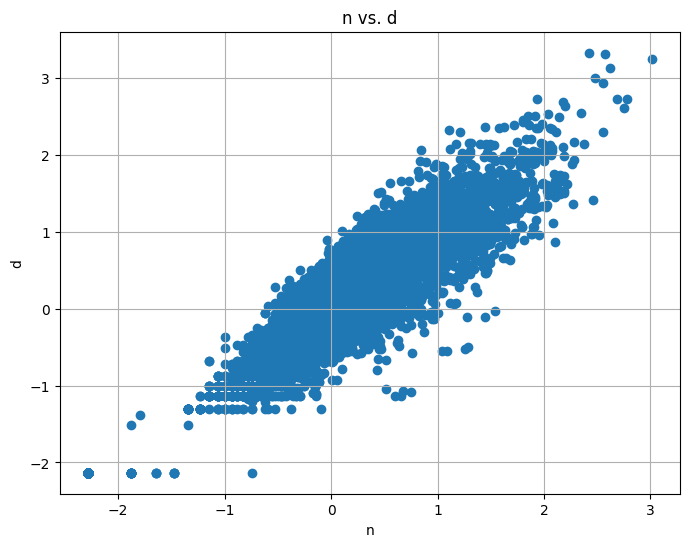

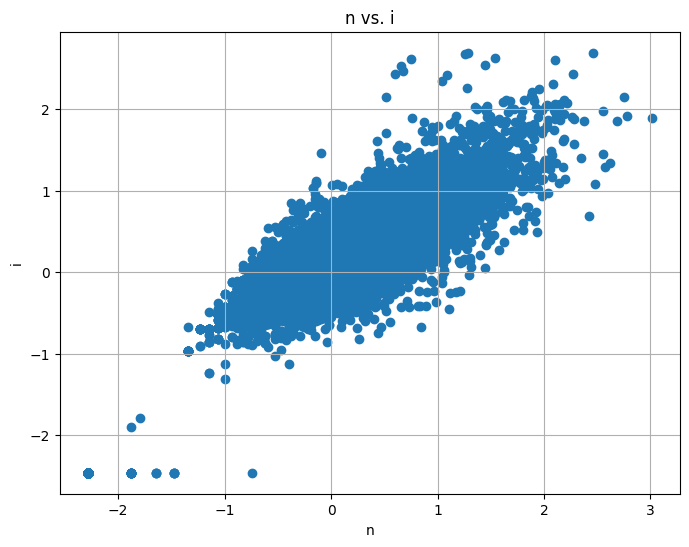

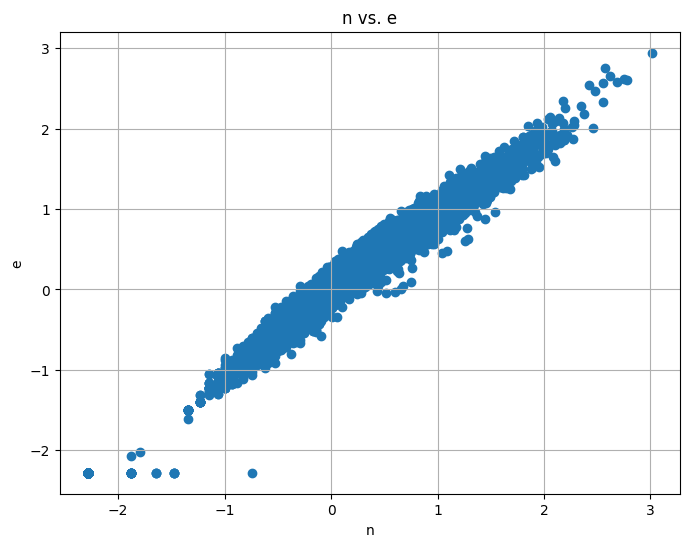

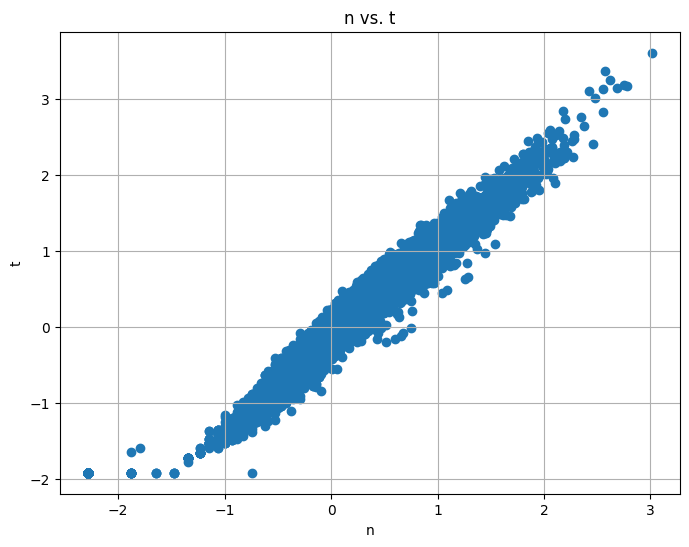

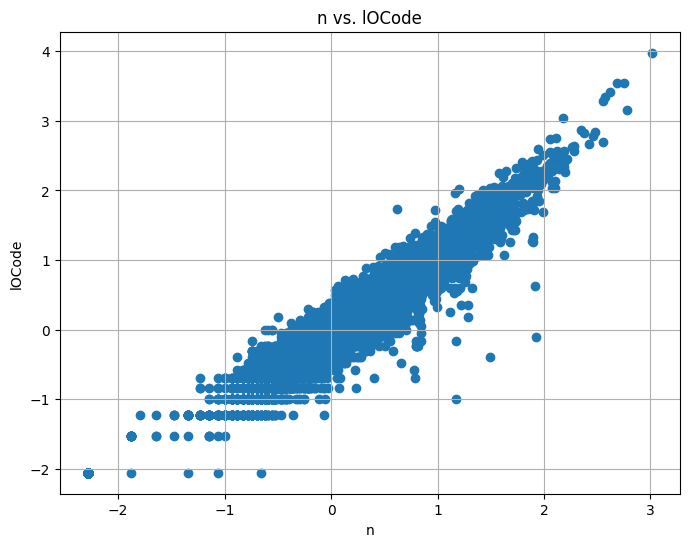

In [ ]:

features_to_plot = ['uniq_Opnd', 'total_Op', 'total_Opnd','uniq_Op','v','d','i','e','t','lOCode']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['n'], df[feature])
    plt.xlabel('n')
    plt.ylabel(feature)
    plt.title(f'n vs. {feature}')
    plt.grid(True)
    plt.show()

we have the Halstead total operators + operands (n) is highly corrolated to all :
'uniq_Opnd',

'total_Op',

'total_Opnd',

'uniq_Op',

'v',

'd',

'i',

'e',

't'.

'lOCode'.

So can drop the rest.

In [ ]:
df = df.drop(columns=features_to_plot)

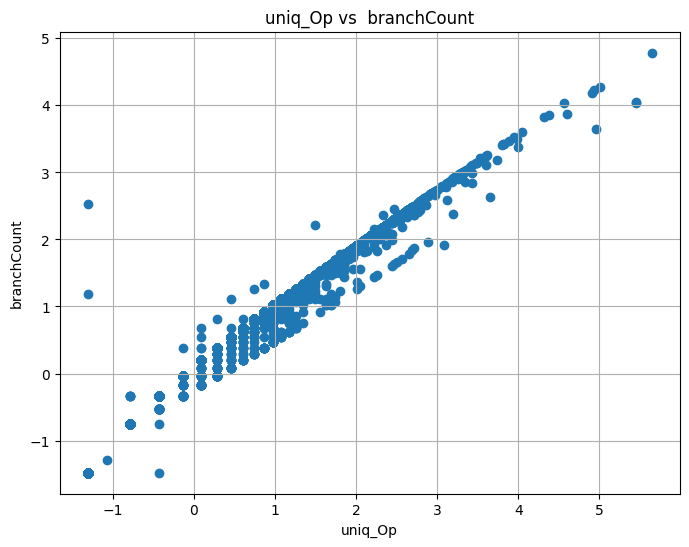

In [ ]:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['v(g)'], df['branchCount'])
    plt.xlabel('uniq_Op')
    plt.ylabel('branchCount')
    plt.title(f'uniq_Op vs  branchCount')
    plt.grid(True)
    plt.show()

Same for v(g) and 'branchCount'

In [ ]:
df = df.drop(columns= 'branchCount')

In [ ]:
df.columns

Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'l', 'b', 'lOComment', 'lOBlank',
       'locCodeAndComment', 'defects'],
      dtype='object')

In [ ]:
df.head()

,loc,v(g),ev(g),iv(g),n,l,b,lOComment,lOBlank,locCodeAndComment,defects
0,-2.940111,-1.070898,-0.411499,-0.770677,-1.796221,8.372472,2.432118,0.398924,-0.246441,1.983802,0
1,-2.993481,-1.302772,-0.656166,-1.043008,-1.878074,6.796463,1.906887,0.003748,-0.662191,1.119858,1
2,0.941484,0.460293,-0.656166,0.828224,0.816036,-0.469554,0.512415,1.665235,0.880039,1.119858,1
3,1.993577,-0.421239,-0.656166,-0.007665,1.463355,-0.362668,2.669546,2.643076,2.079790,1.983802,1
4,0.227331,-0.137449,-0.656166,0.325641,0.553007,-0.362668,-0.012816,0.003748,0.622349,-0.357064,1


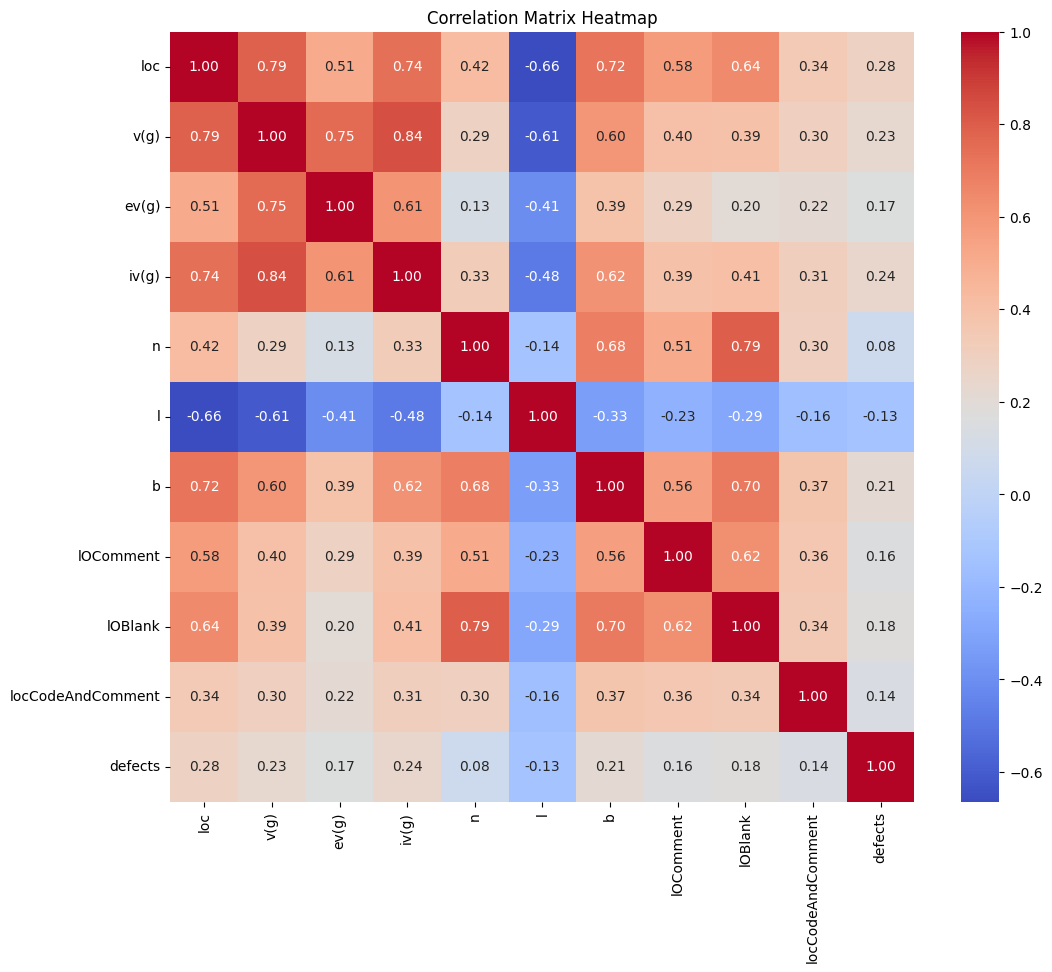

In [ ]:
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df.to_csv('jm1_preprocessed.csv', index=False)

# Modeling

In [ ]:
df=pd.read_csv('jm1_preprocessed.csv')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)


In [ ]:
train.shape

(6234, 11)

In [ ]:
train['defects'].value_counts()

,count
defects,
0,4852
1,1382


In [ ]:
test['defects'].value_counts()

,count
defects,
0,2051
1,622


In [ ]:
X_train = train.drop('defects', axis=1)
y_train = train['defects']
X_test = test.drop('defects', axis=1)
y_test = test['defects']

In [ ]:
!pip install --upgrade codecarbon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.6/516.6 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: termcolor
    Found existing installation: termcolor 2.5.0
    Uninstalling termcolor-2.5.0:
      Successfully uninstalled termcolor-2.5.0
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from codecarbon import EmissionsTracker
import time

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    tracker = EmissionsTracker(allow_multiple_runs=True)
    tracker.start()
    print(tracker.start())

    start_time = time.time()
    model.fit(X_train, y_train)
    emissions = tracker.stop()
    tracker.stop()
    print(emissions)
    execution_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "energy_consumed_kWh": emissions,
        "execution_time_s": execution_time
    }

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
logistic_models = [
    ('LR default', LogisticRegression(
    max_iter=1000,
)),
        ('LR with class_weight:balanced', LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
)),
        ('LR with high max iteration', LogisticRegression(
    max_iter=2000,
)),
            ('LR with stronger regularization', LogisticRegression(
    C=0.1,
    max_iter=1000,
)),

]

In [ ]:
# Store results for each model
results = []

# Evaluate each model
for model_name, model in logistic_models:
    print(f"Evaluating {model_name}...")
    metrics = evaluate_model(model, X_train, X_test, y_train, y_test)
    metrics['model'] = model_name
    results.append(metrics)

[codecarbon WARNING @ 12:49:04] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 12:49:04] [setup] RAM Tracking...
[codecarbon INFO @ 12:49:04] [setup] CPU Tracking...
[codecarbon WARNING @ 12:49:04] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU



Evaluating LR default...


[codecarbon WARNING @ 12:49:05] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 12:49:05] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 12:49:05] [setup] GPU Tracking...
[codecarbon INFO @ 12:49:05] No GPU found.
[codecarbon INFO @ 12:49:05] >>> Tracker's metadata:
[codecarbon INFO @ 12:49:05]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 12:49:05]   Python version: 3.10.12
[codecarbon INFO @ 12:49:05]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 12:49:05]   Available RAM : 12.675 GB
[codecarbon INFO @ 12:49:05]   CPU count: 2
[codecarbon INFO @ 12:49:05]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 12:49:05]   GPU count: None
[codecarbon INFO @ 12:49:05]   GPU model: None
[codecarbon INFO @ 12:49:05] Saving emissions data to file /content/emissions.csv
[codecarbon WARNING @ 12:49:05] Already started tracking
[codecarbon INFO @ 12

None
2.8990905441480616e-07
Evaluating LR with class_weight:balanced...


[codecarbon WARNING @ 12:49:07] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 12:49:07] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 12:49:07] [setup] GPU Tracking...
[codecarbon INFO @ 12:49:07] No GPU found.
[codecarbon INFO @ 12:49:07] >>> Tracker's metadata:
[codecarbon INFO @ 12:49:07]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 12:49:07]   Python version: 3.10.12
[codecarbon INFO @ 12:49:07]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 12:49:07]   Available RAM : 12.675 GB
[codecarbon INFO @ 12:49:07]   CPU count: 2
[codecarbon INFO @ 12:49:07]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 12:49:07]   GPU count: None
[codecarbon INFO @ 12:49:07]   GPU model: None
[codecarbon INFO @ 12:49:07] Saving emissions data to file /content/emissions.csv
[codecarbon WARNING @ 12:49:07] Already started tracking
[codecarbon INFO @ 12

None
2.655595317215134e-07
Evaluating LR with high max iteration...


[codecarbon WARNING @ 12:49:08] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 12:49:08] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 12:49:08] [setup] GPU Tracking...
[codecarbon INFO @ 12:49:08] No GPU found.
[codecarbon INFO @ 12:49:08] >>> Tracker's metadata:
[codecarbon INFO @ 12:49:08]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 12:49:08]   Python version: 3.10.12
[codecarbon INFO @ 12:49:08]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 12:49:08]   Available RAM : 12.675 GB
[codecarbon INFO @ 12:49:08]   CPU count: 2
[codecarbon INFO @ 12:49:08]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 12:49:08]   GPU count: None
[codecarbon INFO @ 12:49:08]   GPU model: None
[codecarbon INFO @ 12:49:08] Saving emissions data to file /content/emissions.csv
[codecarbon WARNING @ 12:49:08] Already started tracking
[codecarbon INFO @ 12

None
2.1808580536200554e-07
Evaluating LR with stronger regularization...


[codecarbon WARNING @ 12:49:10] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 12:49:10] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 12:49:10] [setup] GPU Tracking...
[codecarbon INFO @ 12:49:10] No GPU found.
[codecarbon INFO @ 12:49:10] >>> Tracker's metadata:
[codecarbon INFO @ 12:49:10]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 12:49:10]   Python version: 3.10.12
[codecarbon INFO @ 12:49:10]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 12:49:10]   Available RAM : 12.675 GB
[codecarbon INFO @ 12:49:10]   CPU count: 2
[codecarbon INFO @ 12:49:10]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 12:49:10]   GPU count: None
[codecarbon INFO @ 12:49:10]   GPU model: None
[codecarbon INFO @ 12:49:10] Saving emissions data to file /content/emissions.csv
[codecarbon WARNING @ 12:49:10] Already started tracking
[codecarbon INFO @ 12

None
2.1896936111098653e-07


In [ ]:
# Convert results to DataFrame
results_df_LR = pd.DataFrame(results)

In [ ]:
results_df_LR.head()

,accuracy,precision,recall,f1_score,energy_consumed_kWh,execution_time_s,model
0,0.775907,0.686694,0.548733,0.537050,2.899091e-07,0.137044,LR default
1,0.683128,0.610729,0.640055,0.614175,2.655595e-07,0.104620,LR with class_weight:balanced
2,0.775907,0.686694,0.548733,0.537050,2.180858e-07,0.092926,LR with high max iteration
3,0.776281,0.690238,0.547856,0.535239,2.189694e-07,0.087456,LR with stronger regularization


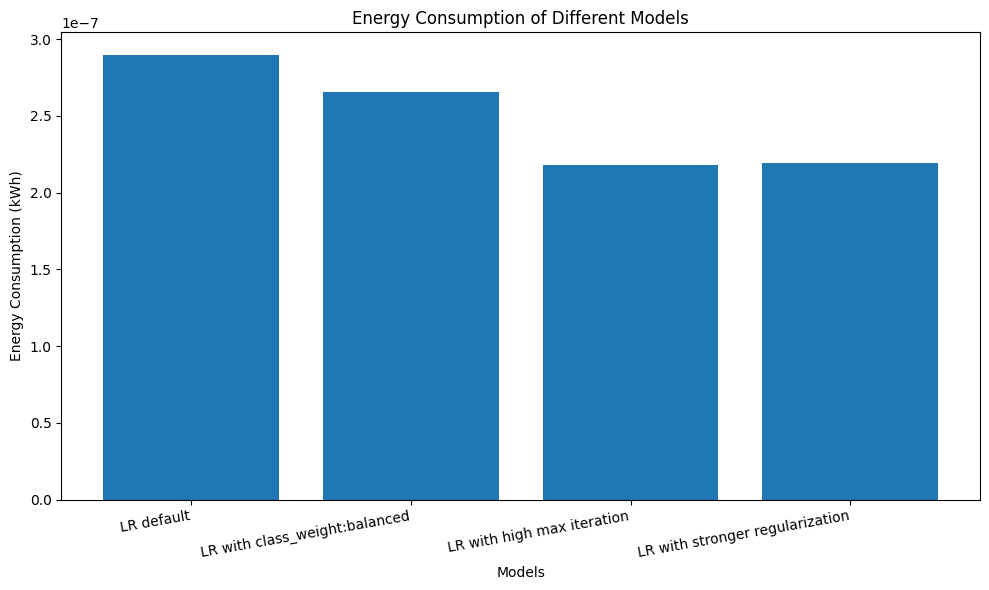

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(results_df_LR['model'], results_df_LR['energy_consumed_kWh'])
plt.xlabel("Models")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption of Different Models")
plt.xticks(rotation=10, ha='right')
plt.tight_layout()
plt.show()

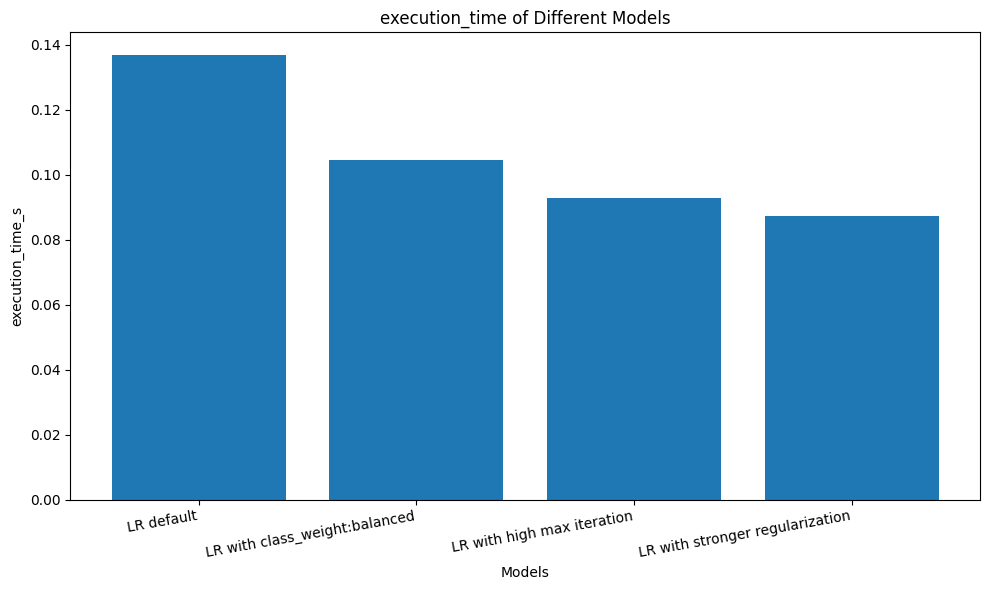

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(results_df_LR['model'], results_df_LR['execution_time_s'])
plt.xlabel("Models")
plt.ylabel("execution_time_s")
plt.title("execution_time of Different Models")
plt.xticks(rotation=10, ha='right')
plt.tight_layout()
plt.show()

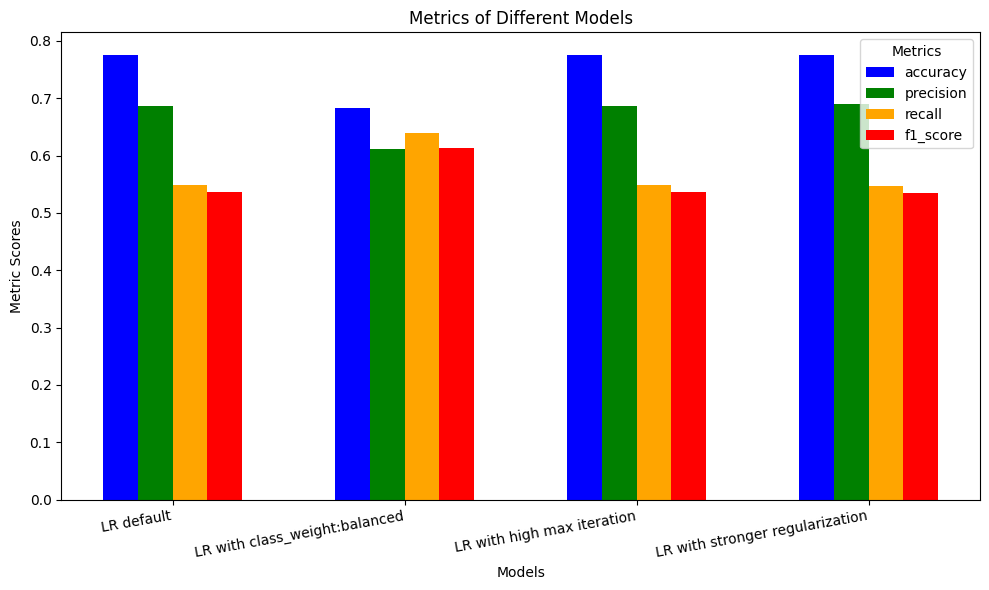

In [ ]:
models = results_df_LR['model']
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
colors = ['blue', 'green', 'orange', 'red']  # Define colors for each metric

# Create positions for grouped bars
x = np.arange(len(models))  # The label locations
width = 0.15 # Width of each bar

# Plot each metric
plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, results_df_LR[metric], width, label=metric, color=colors[i])

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Metric Scores")
plt.title("Metrics of Different Models")
plt.xticks(x + width * 1.5, models, rotation=10, ha='right')  # Center the x-axis labels
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

LR Default : High accuracy and precision,but low recall, and F1-score. Poor performance in handling the minority class.

LR with class_weight = balanced: Balanced precision, recall, and F1-score. Good performance in detecting the minority class.

LR with hight max iteration: Same performance as the default model with lower iterations.

LR with stronger regularzation: does'nt improve much from the other models

Regarding that the different models are similar in terms of performance, Lr with balanced calss_weght outperform in terms of Energy Consumption and performance .

In [ ]:
# Define models with different kernels
Svm_models = [
    ('SVM Linear', SVC(kernel='linear')),
    ('SVM Polynomial deg 3', SVC(kernel='poly', degree=3)),
    ('SVM Polynomial deg 4', SVC(kernel='poly', degree=4)),
    ('SVM Polynomial deg 5', SVC(kernel='poly', degree=5)),
    ('SVM RBF', SVC(kernel='rbf')),
]

In [ ]:
# Store results for each model
results = []

# Evaluate each model
for model_name, model in Svm_models:
    print(f"Evaluating {model_name}...")
    metrics = evaluate_model(model, X_train, X_test, y_train, y_test)
    metrics['model'] = model_name
    results.append(metrics)

[codecarbon WARNING @ 12:51:00] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 12:51:00] [setup] RAM Tracking...
[codecarbon INFO @ 12:51:00] [setup] CPU Tracking...
[codecarbon WARNING @ 12:51:00] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU



Evaluating SVM Linear...


[codecarbon WARNING @ 12:51:01] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 12:51:01] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 12:51:01] [setup] GPU Tracking...
[codecarbon INFO @ 12:51:01] No GPU found.
[codecarbon INFO @ 12:51:01] >>> Tracker's metadata:
[codecarbon INFO @ 12:51:01]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 12:51:01]   Python version: 3.10.12
[codecarbon INFO @ 12:51:01]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 12:51:01]   Available RAM : 12.675 GB
[codecarbon INFO @ 12:51:01]   CPU count: 2
[codecarbon INFO @ 12:51:01]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 12:51:01]   GPU count: None
[codecarbon INFO @ 12:51:01]   GPU model: None
[codecarbon INFO @ 12:51:01] Saving emissions data to file /content/emissions.csv
[codecarbon WARNING @ 12:51:01] Already started tracking


None


[codecarbon INFO @ 12:51:02] Energy consumed for RAM : 0.000001 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 12:51:02] Energy consumed for all CPUs : 0.000012 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 12:51:02] 0.000013 kWh of electricity used since the beginning.
[codecarbon WARNING @ 12:51:02] Tracker already stopped !
[codecarbon INFO @ 12:51:02] Energy consumed for RAM : 0.000001 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 12:51:02] Energy consumed for all CPUs : 0.000012 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 12:51:02] 0.000014 kWh of electricity used since the beginning.


6.04192936312412e-06


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
[codecarbon WARNING @ 12:51:03] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 12:51:03] [setup] RAM Tracking...
[codecarbon INFO @ 12:51:03] [setup] CPU Tracking...
[codecarbon WARNING @ 12:51:03] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU



Evaluating SVM Polynomial deg 3...


[codecarbon WARNING @ 12:51:04] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 12:51:04] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 12:51:04] [setup] GPU Tracking...
[codecarbon INFO @ 12:51:04] No GPU found.
[codecarbon INFO @ 12:51:04] >>> Tracker's metadata:
[codecarbon INFO @ 12:51:04]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 12:51:04]   Python version: 3.10.12
[codecarbon INFO @ 12:51:04]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 12:51:04]   Available RAM : 12.675 GB
[codecarbon INFO @ 12:51:04]   CPU count: 2
[codecarbon INFO @ 12:51:04]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 12:51:04]   GPU count: None
[codecarbon INFO @ 12:51:04]   GPU model: None
[codecarbon INFO @ 12:51:04] Saving emissions data to file /content/emissions.csv
[codecarbon WARNING @ 12:51:04] Already started tracking


None


[codecarbon INFO @ 12:51:06] Energy consumed for RAM : 0.000003 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 12:51:06] Energy consumed for all CPUs : 0.000030 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 12:51:06] 0.000033 kWh of electricity used since the beginning.
[codecarbon WARNING @ 12:51:06] Tracker already stopped !
[codecarbon INFO @ 12:51:06] Energy consumed for RAM : 0.000003 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 12:51:06] Energy consumed for all CPUs : 0.000030 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 12:51:06] 0.000033 kWh of electricity used since the beginning.


1.4908390820489708e-05


[codecarbon WARNING @ 12:51:07] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 12:51:07] [setup] RAM Tracking...
[codecarbon INFO @ 12:51:07] [setup] CPU Tracking...
[codecarbon WARNING @ 12:51:07] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU



Evaluating SVM Polynomial deg 4...


[codecarbon WARNING @ 12:51:08] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 12:51:08] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 12:51:08] [setup] GPU Tracking...
[codecarbon INFO @ 12:51:08] No GPU found.
[codecarbon INFO @ 12:51:08] >>> Tracker's metadata:
[codecarbon INFO @ 12:51:08]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 12:51:08]   Python version: 3.10.12
[codecarbon INFO @ 12:51:08]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 12:51:08]   Available RAM : 12.675 GB
[codecarbon INFO @ 12:51:08]   CPU count: 2
[codecarbon INFO @ 12:51:08]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 12:51:08]   GPU count: None
[codecarbon INFO @ 12:51:08]   GPU model: None
[codecarbon INFO @ 12:51:08] Saving emissions data to file /content/emissions.csv
[codecarbon WARNING @ 12:51:08] Already started tracking


None


[codecarbon INFO @ 12:51:16] Energy consumed for RAM : 0.000010 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 12:51:16] Energy consumed for all CPUs : 0.000092 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 12:51:16] 0.000102 kWh of electricity used since the beginning.
[codecarbon WARNING @ 12:51:16] Tracker already stopped !
[codecarbon INFO @ 12:51:16] Energy consumed for RAM : 0.000010 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 12:51:16] Energy consumed for all CPUs : 0.000092 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 12:51:16] 0.000102 kWh of electricity used since the beginning.


4.630940761990511e-05


[codecarbon WARNING @ 12:51:16] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 12:51:16] [setup] RAM Tracking...
[codecarbon INFO @ 12:51:16] [setup] CPU Tracking...
[codecarbon WARNING @ 12:51:16] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU



Evaluating SVM Polynomial deg 5...


[codecarbon WARNING @ 12:51:17] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 12:51:17] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 12:51:17] [setup] GPU Tracking...
[codecarbon INFO @ 12:51:17] No GPU found.
[codecarbon INFO @ 12:51:17] >>> Tracker's metadata:
[codecarbon INFO @ 12:51:17]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 12:51:17]   Python version: 3.10.12
[codecarbon INFO @ 12:51:17]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 12:51:17]   Available RAM : 12.675 GB
[codecarbon INFO @ 12:51:17]   CPU count: 2
[codecarbon INFO @ 12:51:17]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 12:51:17]   GPU count: None
[codecarbon INFO @ 12:51:17]   GPU model: None
[codecarbon INFO @ 12:51:17] Saving emissions data to file /content/emissions.csv
[codecarbon WARNING @ 12:51:17] Already started tracking


None


[codecarbon INFO @ 12:51:32] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 12:51:32] Energy consumed for all CPUs : 0.000177 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 12:51:32] 0.000197 kWh of electricity used since the beginning.
[codecarbon INFO @ 12:51:34] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 12:51:34] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 12:51:34] 0.000216 kWh of electricity used since the beginning.
[codecarbon WARNING @ 12:51:34] Tracker already stopped !
[codecarbon INFO @ 12:51:34] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 12:51:34] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 12:51:34] 0.000216 kWh of electricity used since the beginning.


9.756743505410461e-05


[codecarbon WARNING @ 12:51:34] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 12:51:34] [setup] RAM Tracking...
[codecarbon INFO @ 12:51:34] [setup] CPU Tracking...
[codecarbon WARNING @ 12:51:34] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU



Evaluating SVM RBF...


[codecarbon WARNING @ 12:51:35] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 12:51:35] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 12:51:35] [setup] GPU Tracking...
[codecarbon INFO @ 12:51:35] No GPU found.
[codecarbon INFO @ 12:51:35] >>> Tracker's metadata:
[codecarbon INFO @ 12:51:35]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 12:51:35]   Python version: 3.10.12
[codecarbon INFO @ 12:51:35]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 12:51:35]   Available RAM : 12.675 GB
[codecarbon INFO @ 12:51:35]   CPU count: 2
[codecarbon INFO @ 12:51:35]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 12:51:35]   GPU count: None
[codecarbon INFO @ 12:51:35]   GPU model: None
[codecarbon INFO @ 12:51:35] Saving emissions data to file /content/emissions.csv
[codecarbon WARNING @ 12:51:35] Already started tracking


None


[codecarbon INFO @ 12:51:37] Energy consumed for RAM : 0.000002 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 12:51:37] Energy consumed for all CPUs : 0.000022 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 12:51:37] 0.000024 kWh of electricity used since the beginning.
[codecarbon WARNING @ 12:51:37] Tracker already stopped !
[codecarbon INFO @ 12:51:37] Energy consumed for RAM : 0.000002 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 12:51:37] Energy consumed for all CPUs : 0.000022 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 12:51:37] 0.000025 kWh of electricity used since the beginning.


1.1020030650287434e-05


In [ ]:
# Convert results to DataFrame
results_df_svm = pd.DataFrame(results)

In [ ]:
results_df_svm.head()

,accuracy,precision,recall,f1_score,energy_consumed_kWh,execution_time_s,model
0,0.767303,0.383651,0.500000,0.434166,0.000006,1.049475,SVM Linear
1,0.772914,0.687761,0.529420,0.500497,0.000015,2.533873,SVM Polynomial deg 3
2,0.776281,0.696274,0.543376,0.526727,0.000046,7.825668,SVM Polynomial deg 4
3,0.775159,0.686695,0.543765,0.528143,0.000098,16.457447,SVM Polynomial deg 5
4,0.773288,0.679080,0.537505,0.517060,0.000011,1.887157,SVM RBF


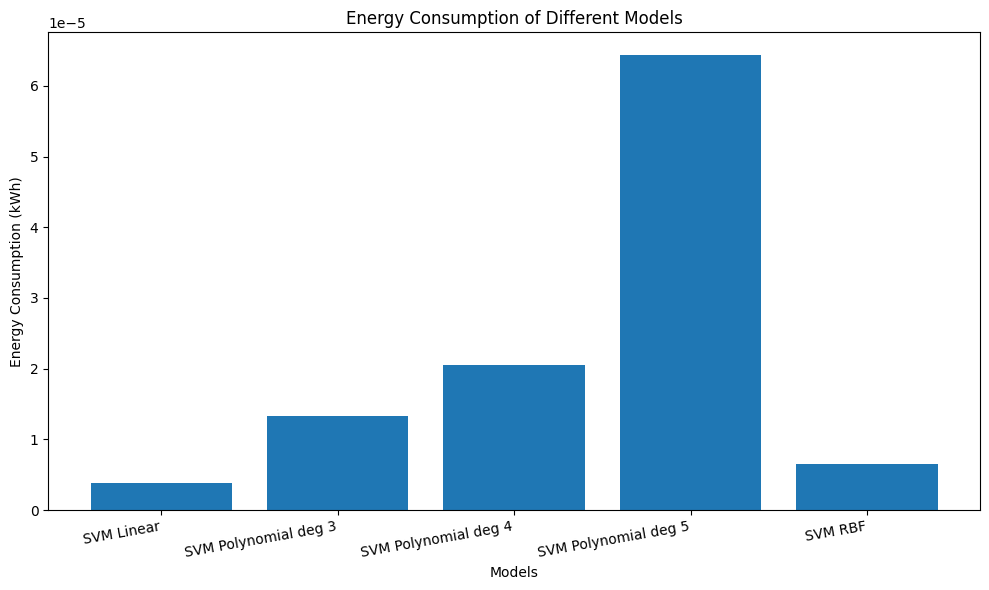

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(results_df_svm['model'], results_df_svm['energy_consumed_kWh'])
plt.xlabel("Models")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption of Different Models")
plt.xticks(rotation=10, ha='right')
plt.tight_layout()
plt.show()

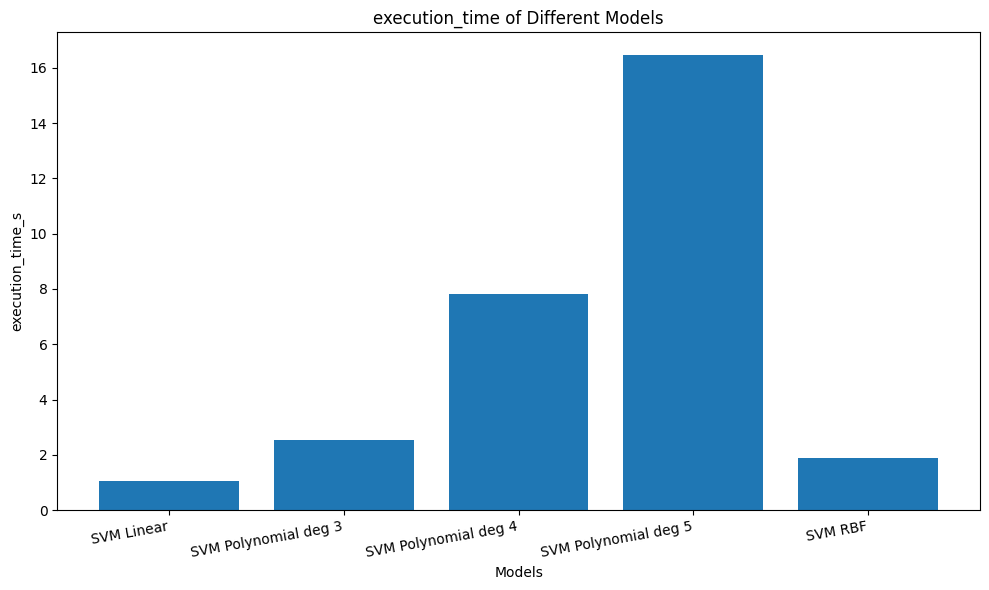

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(results_df_svm['model'], results_df_svm['execution_time_s'])
plt.xlabel("Models")
plt.ylabel("execution_time_s")
plt.title("execution_time of Different Models")
plt.xticks(rotation=10, ha='right')
plt.tight_layout()
plt.show()

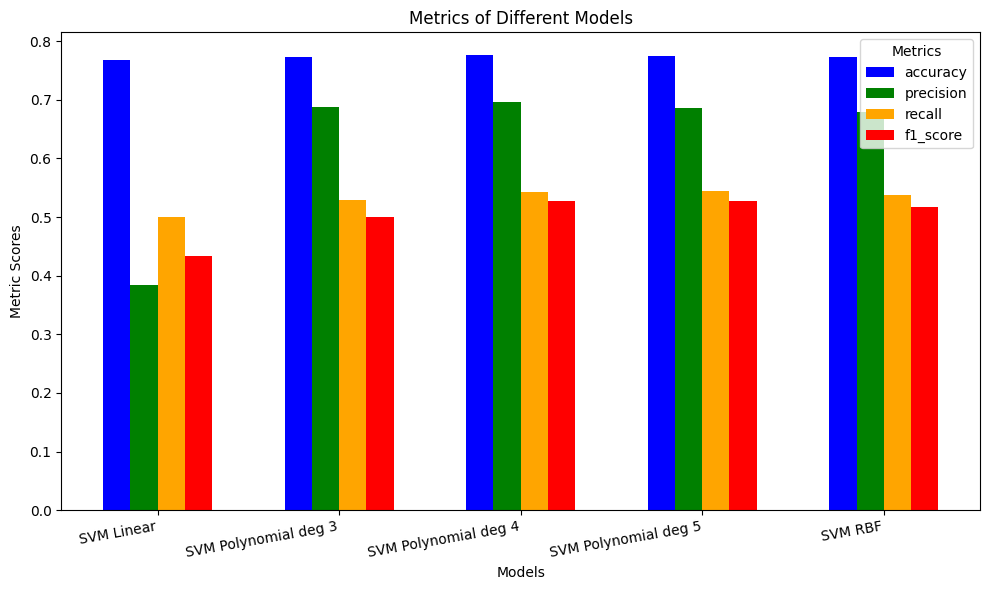

In [ ]:
models = results_df_svm['model']
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
colors = ['blue', 'green', 'orange', 'red']  # Define colors for each metric

# Create positions for grouped bars
x = np.arange(len(models))  # The label locations
width = 0.15 # Width of each bar

# Plot each metric
plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, results_df_svm[metric], width, label=metric, color=colors[i])

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Metric Scores")
plt.title("Metrics of Different Models")
plt.xticks(x + width * 1.5, models, rotation=10, ha='right')  # Center the x-axis labels
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

SVM Linear:
High accuracy but low precision, recall, and F1-score.
Poor performance in handling the minority class.

SVM Polynomial Degree 3:
Balanced precision, recall, and F1-score.
Moderate performance in detecting the minority class.

SVM Polynomial Degree 4:
Slight improvement in recall and F1-score compared to degree 3.
Better at handling the minority class than degree 3.

SVM Polynomial Degree 5:
Comparable recall and F1-score to degree 4.
No significant advantage over degree 4.

SVM RBF:
High recall and F1-score, with good precision.

Regarding that SVM polynomial with degree 4 and 5 and SVM RBF are similar in terms of performance, Svm RBF outperform in terms of Energy Consumption

In [41]:
# Define models with different kernels
dt_models = [
    ('dt default', DecisionTreeClassifier()),
    ('dt with small min_samples_split',DecisionTreeClassifier(min_samples_split=20)),
    ('dt with hight min_samples_split',DecisionTreeClassifier(min_samples_split=300)),
    ('dt with small max depth',DecisionTreeClassifier(max_depth =2)),
    ('dt with hight max depth',DecisionTreeClassifier(max_depth =16)),
]

In [42]:
# Store results for each model
results = []

# Evaluate each model
for model_name, model in dt_models:
    print(f"Evaluating {model_name}...")
    metrics = evaluate_model(model, X_train, X_test, y_train, y_test)
    metrics['model'] = model_name
    results.append(metrics)

[codecarbon WARNING @ 13:36:47] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 13:36:47] [setup] RAM Tracking...
[codecarbon INFO @ 13:36:47] [setup] CPU Tracking...
[codecarbon WARNING @ 13:36:47] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU



Evaluating dt default...


[codecarbon WARNING @ 13:36:49] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:36:49] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:36:49] [setup] GPU Tracking...
[codecarbon INFO @ 13:36:49] No GPU found.
[codecarbon INFO @ 13:36:49] >>> Tracker's metadata:
[codecarbon INFO @ 13:36:49]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 13:36:49]   Python version: 3.10.12
[codecarbon INFO @ 13:36:49]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 13:36:49]   Available RAM : 12.675 GB
[codecarbon INFO @ 13:36:49]   CPU count: 2
[codecarbon INFO @ 13:36:49]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:36:49]   GPU count: None
[codecarbon INFO @ 13:36:49]   GPU model: None
[codecarbon INFO @ 13:36:49] Saving emissions data to file /content/emissions.csv
[codecarbon WARNING @ 13:36:49] Already started tracking
[codecarbon INFO @ 13

None
4.784256697557559e-07
Evaluating dt with small min_samples_split...


[codecarbon WARNING @ 13:36:50] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:36:50] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:36:50] [setup] GPU Tracking...
[codecarbon INFO @ 13:36:50] No GPU found.
[codecarbon INFO @ 13:36:50] >>> Tracker's metadata:
[codecarbon INFO @ 13:36:50]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 13:36:50]   Python version: 3.10.12
[codecarbon INFO @ 13:36:50]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 13:36:50]   Available RAM : 12.675 GB
[codecarbon INFO @ 13:36:50]   CPU count: 2
[codecarbon INFO @ 13:36:50]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:36:50]   GPU count: None
[codecarbon INFO @ 13:36:50]   GPU model: None
[codecarbon INFO @ 13:36:51] Saving emissions data to file /content/emissions.csv
[codecarbon WARNING @ 13:36:51] Already started tracking
[codecarbon INFO @ 13

None
3.7044887002945395e-07
Evaluating dt with hight min_samples_split...


[codecarbon WARNING @ 13:36:52] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:36:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:36:52] [setup] GPU Tracking...
[codecarbon INFO @ 13:36:52] No GPU found.
[codecarbon INFO @ 13:36:52] >>> Tracker's metadata:
[codecarbon INFO @ 13:36:52]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 13:36:52]   Python version: 3.10.12
[codecarbon INFO @ 13:36:52]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 13:36:52]   Available RAM : 12.675 GB
[codecarbon INFO @ 13:36:52]   CPU count: 2
[codecarbon INFO @ 13:36:52]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:36:52]   GPU count: None
[codecarbon INFO @ 13:36:52]   GPU model: None
[codecarbon INFO @ 13:36:52] Saving emissions data to file /content/emissions.csv
[codecarbon WARNING @ 13:36:52] Already started tracking
[codecarbon INFO @ 13

None
1.551808352988212e-07
Evaluating dt with small max depth...


[codecarbon WARNING @ 13:36:53] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:36:53] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:36:53] [setup] GPU Tracking...
[codecarbon INFO @ 13:36:53] No GPU found.
[codecarbon INFO @ 13:36:53] >>> Tracker's metadata:
[codecarbon INFO @ 13:36:53]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 13:36:53]   Python version: 3.10.12
[codecarbon INFO @ 13:36:53]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 13:36:53]   Available RAM : 12.675 GB
[codecarbon INFO @ 13:36:53]   CPU count: 2
[codecarbon INFO @ 13:36:53]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:36:53]   GPU count: None
[codecarbon INFO @ 13:36:53]   GPU model: None
[codecarbon INFO @ 13:36:53] Saving emissions data to file /content/emissions.csv
[codecarbon WARNING @ 13:36:53] Already started tracking
[codecarbon INFO @ 13

None
9.19559733341213e-08
Evaluating dt with hight max depth...


[codecarbon WARNING @ 13:36:55] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:36:55] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:36:55] [setup] GPU Tracking...
[codecarbon INFO @ 13:36:55] No GPU found.
[codecarbon INFO @ 13:36:55] >>> Tracker's metadata:
[codecarbon INFO @ 13:36:55]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 13:36:55]   Python version: 3.10.12
[codecarbon INFO @ 13:36:55]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 13:36:55]   Available RAM : 12.675 GB
[codecarbon INFO @ 13:36:55]   CPU count: 2
[codecarbon INFO @ 13:36:55]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:36:55]   GPU count: None
[codecarbon INFO @ 13:36:55]   GPU model: None
[codecarbon INFO @ 13:36:55] Saving emissions data to file /content/emissions.csv
[codecarbon WARNING @ 13:36:55] Already started tracking
[codecarbon INFO @ 13

None
2.826821978948188e-07


In [43]:
# Convert results to DataFrame
results_df_dt = pd.DataFrame(results)

In [44]:
results_df_dt.head()

,accuracy,precision,recall,f1_score,energy_consumed_kWh,execution_time_s,model
0,0.682753,0.554047,0.553559,0.553795,4.784257e-07,0.130729,dt default
1,0.727273,0.586182,0.565767,0.570171,3.704489e-07,0.108333,dt with small min_samples_split
2,0.768425,0.646972,0.526495,0.497923,1.551808e-07,0.061626,dt with hight min_samples_split
3,0.767303,0.383651,0.500000,0.434166,9.195597e-08,0.049340,dt with small max depth
4,0.708567,0.562999,0.551898,0.554476,2.826822e-07,0.099102,dt with hight max depth


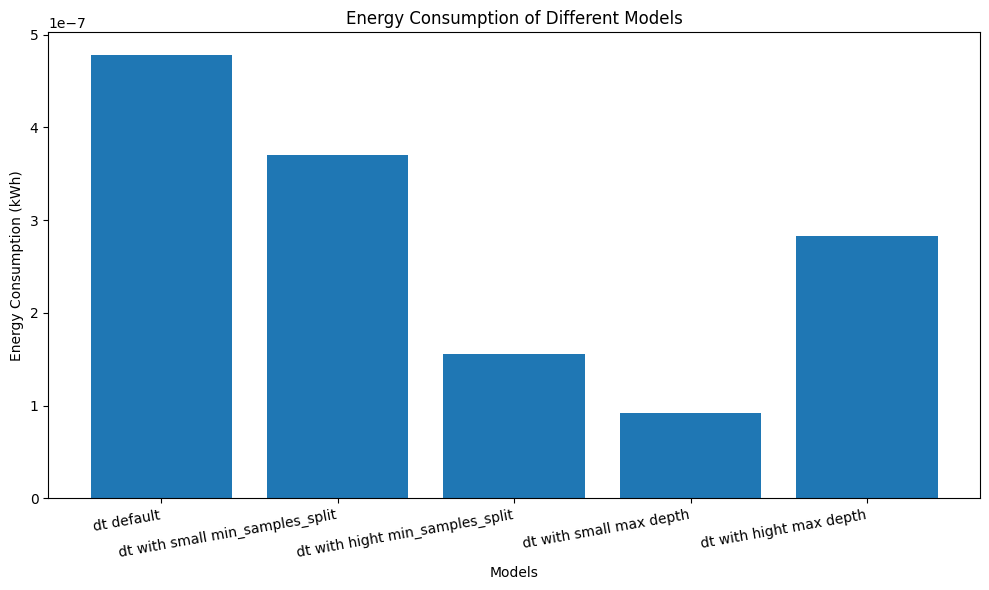

In [45]:
plt.figure(figsize=(10, 6))
plt.bar(results_df_dt['model'], results_df_dt['energy_consumed_kWh'])
plt.xlabel("Models")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption of Different Models")
plt.xticks(rotation=10, ha='right')
plt.tight_layout()
plt.show()

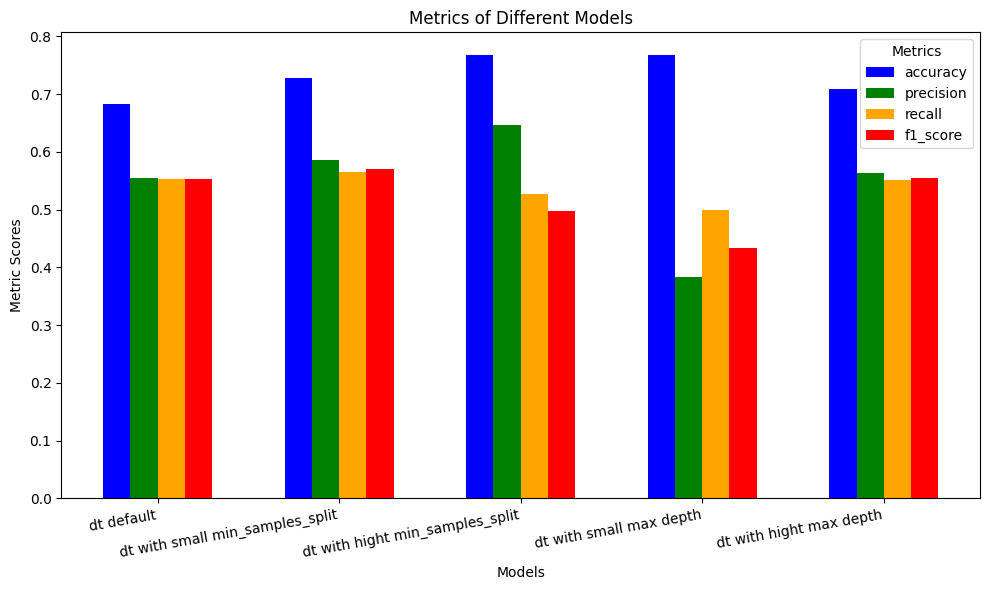

In [46]:
models = results_df_dt['model']
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
colors = ['blue', 'green', 'orange', 'red']  # Define colors for each metric

# Create positions for grouped bars
x = np.arange(len(models))  # The label locations
width = 0.15 # Width of each bar

# Plot each metric
plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, results_df_dt[metric], width, label=metric, color=colors[i])

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Metric Scores")
plt.title("Metrics of Different Models")
plt.xticks(x + width * 1.5, models, rotation=10, ha='right')  # Center the x-axis labels
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

In [47]:
# Define models with different kernels
rf_models = [
    ('rf default', RandomForestClassifier()),
    ('rf with small min_samples_split',RandomForestClassifier(min_samples_split=20)),
    ('rf with hight min_samples_split',RandomForestClassifier(min_samples_split=300)),
    ('rf with small max depth',RandomForestClassifier(max_depth =2)),
    ('rf with hight max depth',RandomForestClassifier(max_depth =16)),
]

In [48]:
# Store results for each model
results = []

# Evaluate each model
for model_name, model in rf_models:
    print(f"Evaluating {model_name}...")
    metrics = evaluate_model(model, X_train, X_test, y_train, y_test)
    metrics['model'] = model_name
    results.append(metrics)

[codecarbon WARNING @ 13:37:38] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 13:37:38] [setup] RAM Tracking...
[codecarbon INFO @ 13:37:38] [setup] CPU Tracking...
[codecarbon WARNING @ 13:37:38] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU



Evaluating rf default...


[codecarbon WARNING @ 13:37:39] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:37:39] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:37:39] [setup] GPU Tracking...
[codecarbon INFO @ 13:37:39] No GPU found.
[codecarbon INFO @ 13:37:39] >>> Tracker's metadata:
[codecarbon INFO @ 13:37:39]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 13:37:39]   Python version: 3.10.12
[codecarbon INFO @ 13:37:39]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 13:37:39]   Available RAM : 12.675 GB
[codecarbon INFO @ 13:37:39]   CPU count: 2
[codecarbon INFO @ 13:37:39]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:37:39]   GPU count: None
[codecarbon INFO @ 13:37:39]   GPU model: None
[codecarbon INFO @ 13:37:39] Saving emissions data to file /content/emissions.csv
[codecarbon WARNING @ 13:37:39] Already started tracking


None


[codecarbon INFO @ 13:37:41] Energy consumed for RAM : 0.000002 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 13:37:41] Energy consumed for all CPUs : 0.000017 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:37:41] 0.000019 kWh of electricity used since the beginning.
[codecarbon WARNING @ 13:37:41] Tracker already stopped !
[codecarbon INFO @ 13:37:41] Energy consumed for RAM : 0.000002 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 13:37:41] Energy consumed for all CPUs : 0.000017 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:37:41] 0.000019 kWh of electricity used since the beginning.
[codecarbon WARNING @ 13:37:41] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 13:37:41] [setup] RAM Tracking...
[codecarbon INFO @ 13:37:41] [setup] CPU Tracking...
[codecarbon WARNING @ 13:37:41] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\power

8.606510135635493e-06
Evaluating rf with small min_samples_split...


[codecarbon WARNING @ 13:37:42] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:37:42] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:37:42] [setup] GPU Tracking...
[codecarbon INFO @ 13:37:42] No GPU found.
[codecarbon INFO @ 13:37:42] >>> Tracker's metadata:
[codecarbon INFO @ 13:37:42]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 13:37:42]   Python version: 3.10.12
[codecarbon INFO @ 13:37:42]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 13:37:42]   Available RAM : 12.675 GB
[codecarbon INFO @ 13:37:42]   CPU count: 2
[codecarbon INFO @ 13:37:42]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:37:42]   GPU count: None
[codecarbon INFO @ 13:37:42]   GPU model: None
[codecarbon INFO @ 13:37:42] Saving emissions data to file /content/emissions.csv
[codecarbon WARNING @ 13:37:42] Already started tracking


None


[codecarbon INFO @ 13:37:44] Energy consumed for RAM : 0.000002 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 13:37:44] Energy consumed for all CPUs : 0.000016 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:37:44] 0.000018 kWh of electricity used since the beginning.
[codecarbon WARNING @ 13:37:44] Tracker already stopped !
[codecarbon INFO @ 13:37:44] Energy consumed for RAM : 0.000002 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 13:37:44] Energy consumed for all CPUs : 0.000016 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:37:44] 0.000018 kWh of electricity used since the beginning.
[codecarbon WARNING @ 13:37:44] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 13:37:44] [setup] RAM Tracking...
[codecarbon INFO @ 13:37:44] [setup] CPU Tracking...
[codecarbon WARNING @ 13:37:44] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\power

8.094262188680212e-06
Evaluating rf with hight min_samples_split...


[codecarbon WARNING @ 13:37:45] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:37:45] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:37:45] [setup] GPU Tracking...
[codecarbon INFO @ 13:37:45] No GPU found.
[codecarbon INFO @ 13:37:45] >>> Tracker's metadata:
[codecarbon INFO @ 13:37:45]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 13:37:45]   Python version: 3.10.12
[codecarbon INFO @ 13:37:45]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 13:37:45]   Available RAM : 12.675 GB
[codecarbon INFO @ 13:37:45]   CPU count: 2
[codecarbon INFO @ 13:37:45]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:37:45]   GPU count: None
[codecarbon INFO @ 13:37:45]   GPU model: None
[codecarbon INFO @ 13:37:45] Saving emissions data to file /content/emissions.csv
[codecarbon WARNING @ 13:37:45] Already started tracking


None


[codecarbon INFO @ 13:37:46] Energy consumed for RAM : 0.000001 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 13:37:46] Energy consumed for all CPUs : 0.000007 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:37:46] 0.000008 kWh of electricity used since the beginning.
[codecarbon WARNING @ 13:37:46] Tracker already stopped !
[codecarbon INFO @ 13:37:46] Energy consumed for RAM : 0.000001 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 13:37:46] Energy consumed for all CPUs : 0.000007 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:37:46] 0.000008 kWh of electricity used since the beginning.
[codecarbon WARNING @ 13:37:46] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 13:37:46] [setup] RAM Tracking...
[codecarbon INFO @ 13:37:46] [setup] CPU Tracking...
[codecarbon WARNING @ 13:37:46] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\power

3.4200968095964893e-06
Evaluating rf with small max depth...


[codecarbon WARNING @ 13:37:47] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:37:47] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:37:47] [setup] GPU Tracking...
[codecarbon INFO @ 13:37:47] No GPU found.
[codecarbon INFO @ 13:37:47] >>> Tracker's metadata:
[codecarbon INFO @ 13:37:47]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 13:37:47]   Python version: 3.10.12
[codecarbon INFO @ 13:37:47]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 13:37:47]   Available RAM : 12.675 GB
[codecarbon INFO @ 13:37:47]   CPU count: 2
[codecarbon INFO @ 13:37:47]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:37:47]   GPU count: None
[codecarbon INFO @ 13:37:47]   GPU model: None
[codecarbon INFO @ 13:37:47] Saving emissions data to file /content/emissions.csv
[codecarbon WARNING @ 13:37:47] Already started tracking


None


[codecarbon INFO @ 13:37:47] Energy consumed for RAM : 0.000000 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 13:37:47] Energy consumed for all CPUs : 0.000004 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:37:47] 0.000004 kWh of electricity used since the beginning.
[codecarbon WARNING @ 13:37:47] Tracker already stopped !
[codecarbon INFO @ 13:37:47] Energy consumed for RAM : 0.000000 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 13:37:47] Energy consumed for all CPUs : 0.000004 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:37:47] 0.000005 kWh of electricity used since the beginning.
[codecarbon WARNING @ 13:37:47] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 13:37:47] [setup] RAM Tracking...
[codecarbon INFO @ 13:37:47] [setup] CPU Tracking...
[codecarbon WARNING @ 13:37:47] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\power

1.9406254296927403e-06
Evaluating rf with hight max depth...


[codecarbon WARNING @ 13:37:49] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:37:49] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:37:49] [setup] GPU Tracking...
[codecarbon INFO @ 13:37:49] No GPU found.
[codecarbon INFO @ 13:37:49] >>> Tracker's metadata:
[codecarbon INFO @ 13:37:49]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 13:37:49]   Python version: 3.10.12
[codecarbon INFO @ 13:37:49]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 13:37:49]   Available RAM : 12.675 GB
[codecarbon INFO @ 13:37:49]   CPU count: 2
[codecarbon INFO @ 13:37:49]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:37:49]   GPU count: None
[codecarbon INFO @ 13:37:49]   GPU model: None
[codecarbon INFO @ 13:37:49] Saving emissions data to file /content/emissions.csv
[codecarbon WARNING @ 13:37:49] Already started tracking


None


[codecarbon INFO @ 13:37:50] Energy consumed for RAM : 0.000001 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 13:37:50] Energy consumed for all CPUs : 0.000012 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:37:50] 0.000013 kWh of electricity used since the beginning.
[codecarbon WARNING @ 13:37:50] Tracker already stopped !
[codecarbon INFO @ 13:37:50] Energy consumed for RAM : 0.000001 kWh. RAM Power : 4.7530388832092285 W
[codecarbon INFO @ 13:37:50] Energy consumed for all CPUs : 0.000012 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:37:50] 0.000014 kWh of electricity used since the beginning.


6.045736728406995e-06


In [49]:
# Convert results to DataFrame
results_df_rf = pd.DataFrame(results)

In [50]:
results_df_rf.head()

,accuracy,precision,recall,f1_score,energy_consumed_kWh,execution_time_s,model
0,0.761317,0.629541,0.561068,0.562064,0.000009,1.503345,rf default
1,0.772166,0.663091,0.554696,0.549136,0.000008,1.417688,rf with small min_samples_split
2,0.771792,0.667453,0.537650,0.518337,0.000003,0.620243,rf with hight min_samples_split
3,0.773663,0.741007,0.520386,0.479145,0.000002,0.364072,rf with small max depth
4,0.769547,0.652655,0.560271,0.558977,0.000006,1.074863,rf with hight max depth


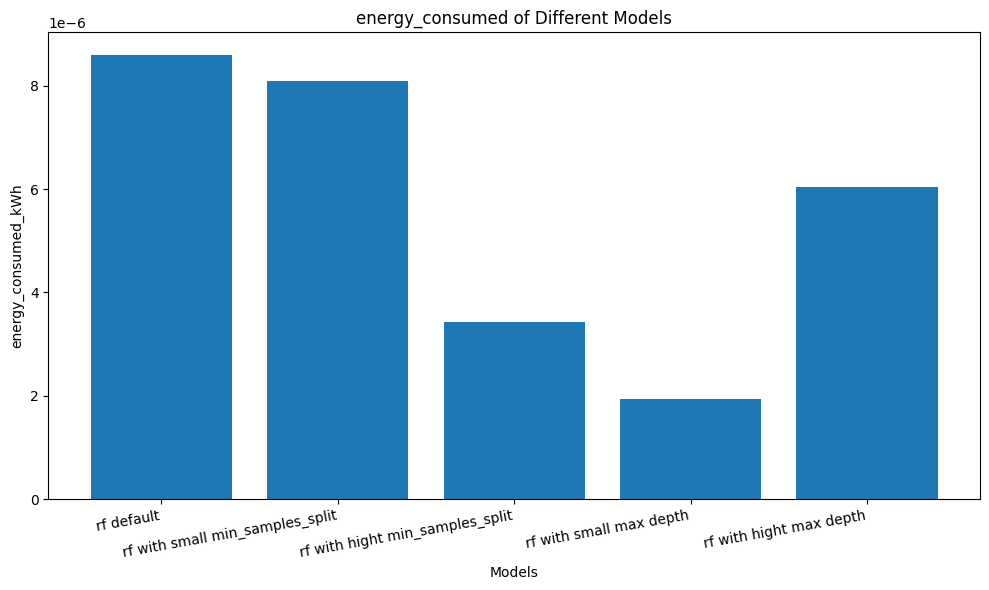

In [60]:
plt.figure(figsize=(10, 6))
plt.bar(results_df_rf['model'], results_df_rf['energy_consumed_kWh'])
plt.xlabel("Models")
plt.ylabel("energy_consumed_kWh")
plt.title("energy_consumed of Different Models")
plt.xticks(rotation=10, ha='right')
plt.tight_layout()
plt.show()

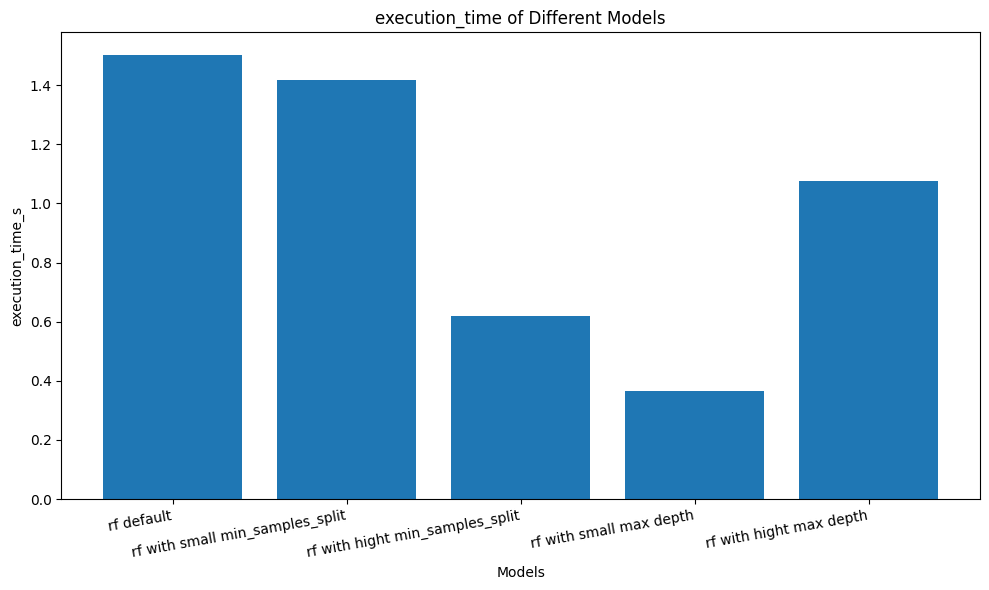

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(results_df_rf['model'], results_df_rf['execution_time_s'])
plt.xlabel("Models")
plt.ylabel("execution_time_s")
plt.title("execution_time of Different Models")
plt.xticks(rotation=10, ha='right')
plt.tight_layout()
plt.show()

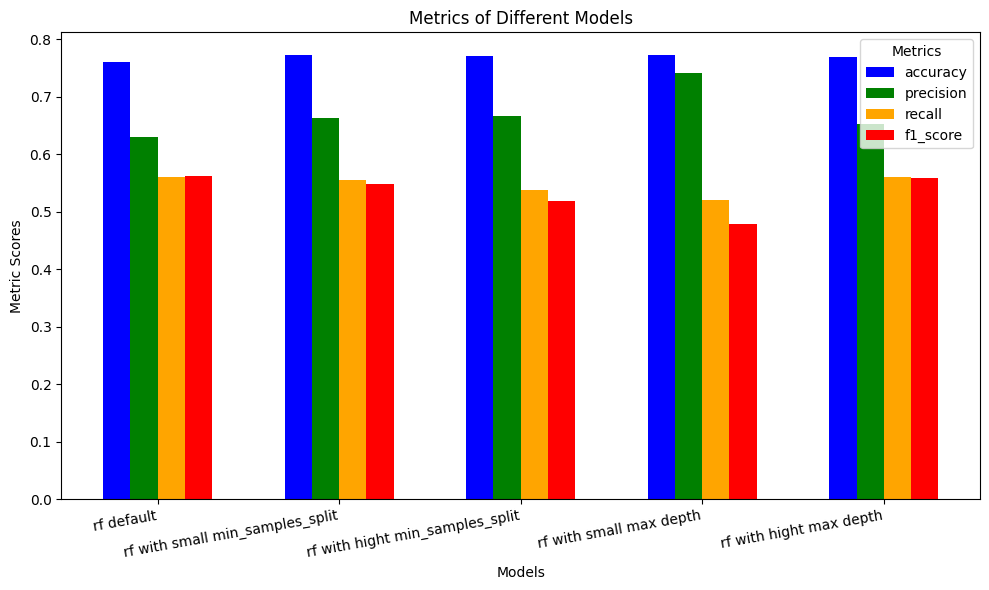

In [53]:
models = results_df_rf['model']
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
colors = ['blue', 'green', 'orange', 'red']  # Define colors for each metric

# Create positions for grouped bars
x = np.arange(len(models))  # The label locations
width = 0.15 # Width of each bar

# Plot each metric
plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, results_df_rf[metric], width, label=metric, color=colors[i])

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Metric Scores")
plt.title("Metrics of Different Models")
plt.xticks(x + width * 1.5, models, rotation=10, ha='right')  # Center the x-axis labels
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

RF Default: Performs well across all metrics but slightly lower in recall.

RF with High Min Samples Split: Precision is slightly better than recall, but overall balanced.

RF with Small Max Depth: Lower recall and F1 compared to others.

RF with High Max Depth: Shows a slight improvement in accuracy and F1-score, suggesting better general performance.

**RF with High Max Depth stands out as the best option since it maintains high accuracy and balanced F1-score. Also a betetr energy consumption compared to the RF default that perform as well as with max depth**

# Model Selection

In [54]:
rf_max_depth_row = results_df_rf.loc[results_df_rf['model'] == 'rf with hight max depth']

dt_min_samples_split_row = results_df_dt.loc[results_df_dt['model'] == 'dt with small min_samples_split']

svm_rbf_row = results_df_svm.loc[results_df_svm['model'] == 'SVM RBF']

lr_balanced_row = results_df_LR.loc[results_df_LR['model'] == 'LR with class_weight:balanced']

new_df = pd.concat([rf_max_depth_row, dt_min_samples_split_row, svm_rbf_row, lr_balanced_row])

new_df = new_df.reset_index(drop=True)


In [55]:
new_df

,accuracy,precision,recall,f1_score,energy_consumed_kWh,execution_time_s,model
0,0.769547,0.652655,0.560271,0.558977,6.045737e-06,1.074863,rf with hight max depth
1,0.727273,0.586182,0.565767,0.570171,3.704489e-07,0.108333,dt with small min_samples_split
2,0.773288,0.679080,0.537505,0.517060,1.102003e-05,1.887157,SVM RBF
3,0.683128,0.610729,0.640055,0.614175,2.655595e-07,0.104620,LR with class_weight:balanced


In [56]:
new_df.to_csv('results.csv', index=False)

In [57]:
results=new_df.copy()

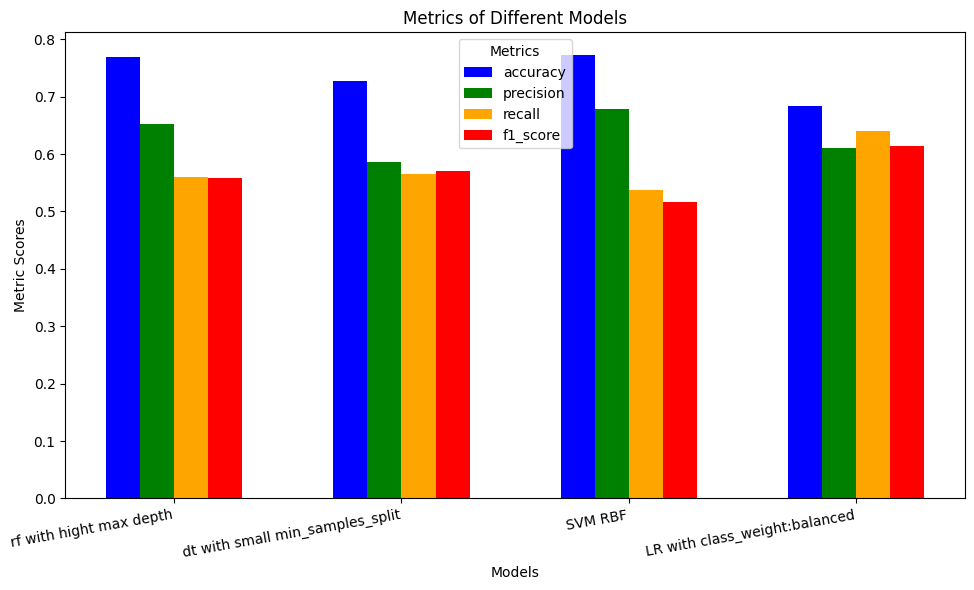

In [58]:
models = results['model']
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
colors = ['blue', 'green', 'orange', 'red']  # Define colors for each metric

# Create positions for grouped bars
x = np.arange(len(models))  # The label locations
width = 0.15 # Width of each bar

# Plot each metric
plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, results[metric], width, label=metric, color=colors[i])

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Metric Scores")
plt.title("Metrics of Different Models")
plt.xticks(x + width * 1.5, models, rotation=10, ha='right')  # Center the x-axis labels
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

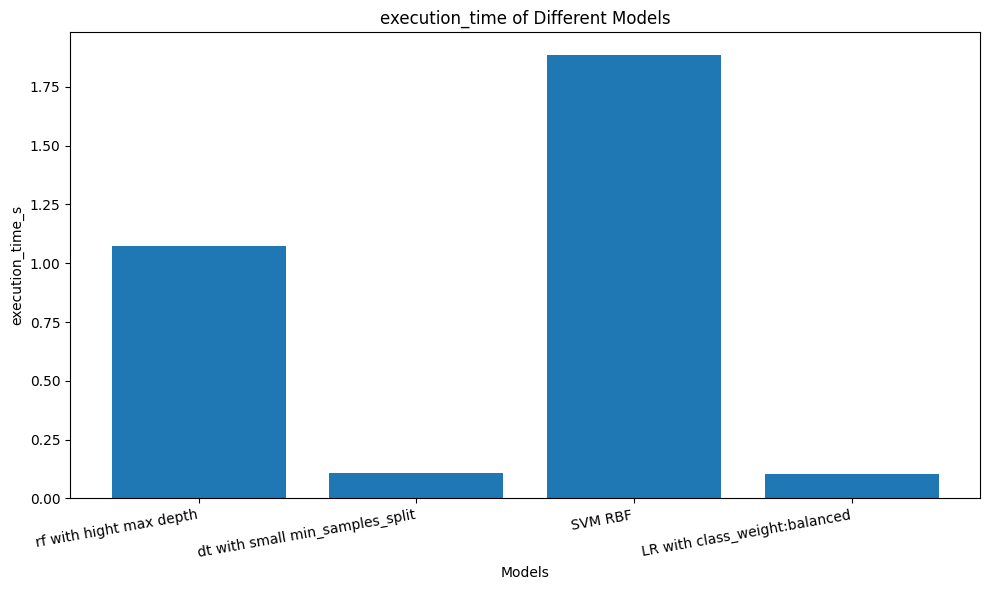

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(results['model'], results['execution_time_s'])
plt.xlabel("Models")
plt.ylabel("execution_time_s")
plt.title("execution_time of Different Models")
plt.xticks(rotation=10, ha='right')
plt.tight_layout()
plt.show()

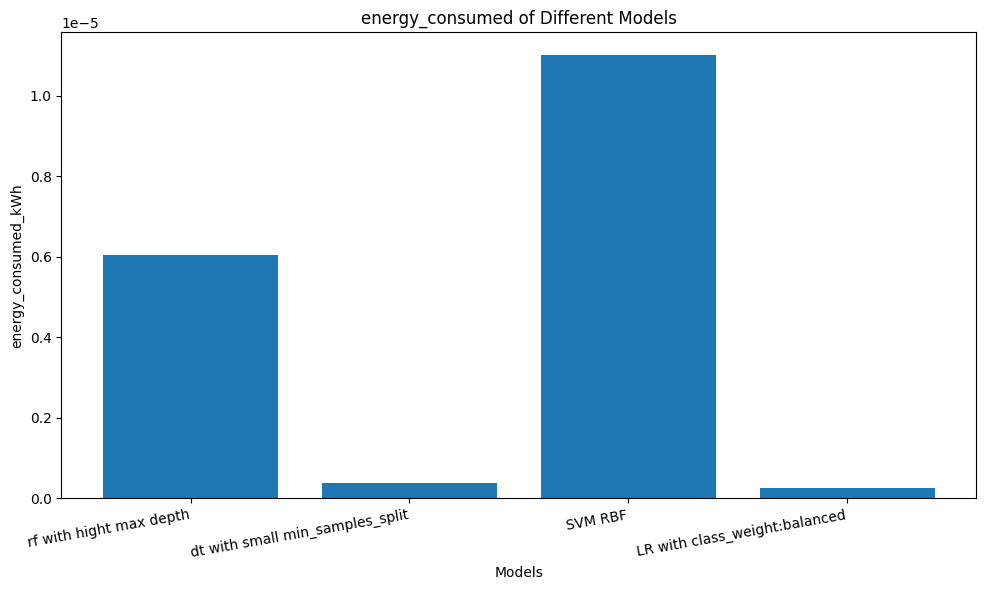

In [61]:
plt.figure(figsize=(10, 6))
plt.bar(results['model'], results['energy_consumed_kWh'])
plt.xlabel("Models")
plt.ylabel("energy_consumed_kWh")
plt.title("energy_consumed of Different Models")
plt.xticks(rotation=10, ha='right')
plt.tight_layout()
plt.show()

We can see here that dt with small min_samples_split and Logitic regression model outperfom the others in terms of energy Consumption.
Finally , the Lr Model shows also the better performance in terms of Recall , F1-score which means better classification of the minority class ( the need of refactoring)